In [1]:
library(ggplot2)
library(data.table)
library(caret)
library(rpart)
library(genlasso)
library(dplyr)
library(Metrics)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Loading required package: lattice
Warning message:
"package 'genlasso' was built under R version 3.6.3"Loading required package: Matrix
Loading required package: igraph
Warning message:
"package 'igraph' was built under R version 3.6.3"
Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union


Attaching package: 'dplyr'

The following objects are masked from 'package:igraph':

    as_data_frame, groups, union

The following objects are masked from 'package:data.table':

    between, first, last

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'Metrics' was built under R version 3.6.3"
Atta

# Data Preperation

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129
1,-0.4642765,-0.5550479,-0.84284310,-0.86589548,-0.9363963,-0.8172700,-0.2636122,-1.25804830,-1.2503934,...,-1.3310856,-1.0837000,-1.0179615,-0.9160287,-1.1342892,-0.9202237,-0.7893615,-0.6387058,-0.9636643,-1.24516910
1,-0.8969721,-0.6856855,-1.35138180,-1.45866680,-1.1653456,-1.4039293,-1.8217996,-0.83160109,-1.0163124,...,-1.0625534,-1.5686762,-1.3640403,-1.1551774,-0.9958611,-1.1637529,-0.9165233,-0.5820981,-1.2590094,-1.39252410
1,-0.4646960,-0.5677389,-0.03202276,-0.63504562,-0.6028255,-0.2668563,-0.2670613,-0.93104230,-0.4493819,...,-0.2867213,-0.6371576,-0.1552602,-0.6881293,-0.8856088,-0.7662393,-0.8653152,-0.2844857,-0.6878891,-0.88760835
3,-0.1871897,-0.6208077,-0.81566070,-0.52139796,-0.7904229,-0.9675174,-1.4870063,-0.27788714,-0.8350747,...,-0.9086154,-0.7262865,0.1837776,-0.7374441,-1.1139967,-0.3939866,-0.5878895,-0.6082319,-0.6364646,-0.34902865
2,-1.1360166,-1.3191953,-1.84462380,-0.78869178,-0.2517154,-1.4876032,-0.6687641,-0.34036037,-1.0463815,...,-1.1829110,-1.0735136,-1.6113624,-1.0643404,-0.9707364,-0.8272809,-0.9535377,-1.2701854,-1.7427579,-0.92594391
2,-0.5687087,-0.8881180,-0.04797658,-0.03803611,-0.4830683,-1.0946887,-0.9534529,-0.03000688,-0.7954546,...,-0.9907398,0.5183746,-0.2285628,-0.5652887,-0.6429980,-1.1094278,-0.1010932,-0.2339490,-0.6198269,-0.08306189


class,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129
1,-0.4642765,-0.5550479,-0.84284310,-0.8658955,-0.9363963,-0.8172700,-0.2636122,-1.2580483,-1.2503934,...,-1.3310856,-1.0837000,-1.0179615,-0.9160287,-1.1342892,-0.9202237,-0.7893615,-0.6387058,-0.9636643,-1.2451691
1,-0.8969721,-0.6856855,-1.35138180,-1.4586668,-1.1653456,-1.4039293,-1.8217996,-0.8316011,-1.0163124,...,-1.0625534,-1.5686762,-1.3640403,-1.1551774,-0.9958611,-1.1637529,-0.9165233,-0.5820981,-1.2590094,-1.3925241
1,-0.4646960,-0.5677389,-0.03202276,-0.6350456,-0.6028255,-0.2668563,-0.2670613,-0.9310423,-0.4493819,...,-0.2867213,-0.6371576,-0.1552602,-0.6881293,-0.8856088,-0.7662393,-0.8653152,-0.2844857,-0.6878891,-0.8876084
1,-0.9658386,-1.6445832,-1.80593540,-1.4996576,-0.9200879,-1.1157058,-0.6501953,-0.9187663,-1.2347080,...,-1.0725346,-1.0630339,-1.3165634,-0.7357389,-1.0521517,-0.9604649,-1.1335659,-0.6103437,-1.1652195,-0.6858989
1,-1.1864222,-0.8931970,-0.97773692,-0.6341093,-1.3848198,-1.2719261,-1.2121711,-1.4527917,-0.9344170,...,-0.8568934,-1.2176250,-0.8236537,-1.2804516,-1.5893960,-0.9982938,-0.8107998,-0.9815906,-1.2784443,-1.1078289
1,-1.9453272,-1.4498402,-1.48894560,-1.8004841,-2.3130602,-1.7720853,-2.1548821,-1.3312254,-2.2651396,...,0.3899754,-0.1803694,0.5541209,0.6861262,0.6906180,0.6207642,0.9260082,-1.9410525,-2.1112366,-1.7680882


id,class,time,value
1,1,1,-0.4642765
1,1,2,-0.5550479
1,1,3,-0.8428431
1,1,4,-0.8658955
1,1,5,-0.9363963
1,1,6,-0.8172700


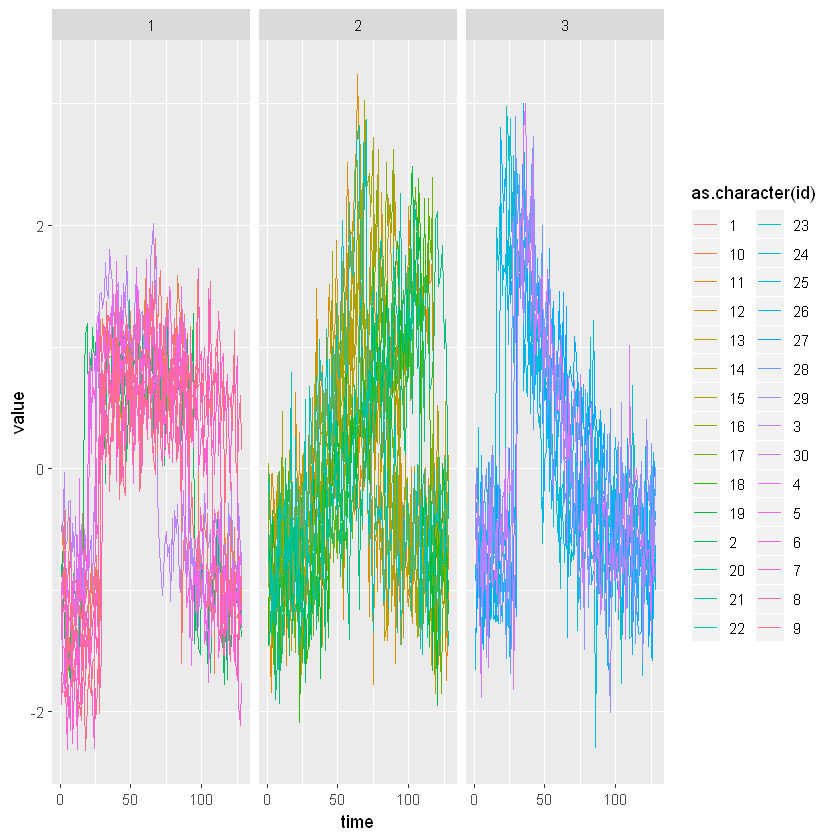

In [2]:
directory <- getwd()

dataset <- 'CBF_TRAIN.txt'

train_data_path <- sprintf('CBF_TRAIN.txt',directory,dataset,dataset)

train_data <- fread(train_data_path)

head(train_data)

setnames(train_data,'V1','class')

train_data <- train_data[order(class)]

head(train_data)

train_data[,class:=as.character(class)]
train_data[,id:=1:.N]
long_train=melt(train_data,id.vars=c('id','class'))

long_train[,time:=as.numeric(gsub("\\D", "", variable))-1]

long_train=long_train[,list(id,class,time,value)]
long_train=long_train[order(id,time)]

head(long_train)

ggplot(long_train, aes(time,value)) + geom_line(aes(color=as.character(id))) +
  facet_wrap(~class)

# Fused Lasso

In [7]:
lasso_results <- vector("list",30)

for(i in 1:30){
  selected_dt <- long_train[id == i]
  selected_dt <- as.matrix(selected_dt[,4], rownames=FALSE)
  flasso <- trendfilter(selected_dt, ord=0)
  cv <- cv.trendfilter(flasso)
     
    print(paste0(i,'.Time Series' ))
    print(paste0('minimum crossvalidated error:',cv$lambda.min))
    print(paste0('1se error:',cv$lambda.min))
  lasso_results[[i]] <- predict.genlasso(flasso, cv$lambda.min)
  
}



Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
[1] "1.Time Series"
[1] "minimum crossvalidated error:0.5087665975"
[1] "1se error:0.5087665975"
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
[1] "2.Time Series"
[1] "minimum crossvalidated error:1.54482427000001"
[1] "1se error:1.54482427000001"
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
[1] "3.Time Series"
[1] "minimum crossvalidated error:0.673140352142856"
[1] "1se error:0.673140352142856"
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
[1] "4.Time Series"
[1] "minimum crossvalidated error:1.22983253178571"
[1] "1se error:1.22983253178571"
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
[1] "5.Time Series"
[1] "minimum crossvalidated error:0.155083875"
[1] "1se error:0.155083875"
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
[1] "6.Time Series"
[1] "minimum crossvalidated error:1.2025240679"
[1] "1se error:1.2025240679"
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
[1

In [8]:
lasso_dt = vector('list', 30)
for(i in seq(1:30)){
lasso_dt[[i]] =as.data.table(t(lasso_results[[i]]$fit))
}

In [9]:
lasso_best_fit_dt = rbindlist(lasso_dt)
lasso_best_fit_dt

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128
-0.7505869,-0.7505869,-0.7505869,-0.7505869,-0.7505869,-0.7505869,-0.7505869,-0.9745224,-0.9745224,-0.9745224,...,-0.9531423,-0.9531423,-0.9531423,-0.9531423,-0.9531423,-0.9531423,-0.9531423,-0.9531423,-0.9531423,-0.9531423
-1.0647598,-1.0647598,-1.0647598,-1.0647598,-1.0647598,-1.0647598,-1.0647598,-1.0647598,-1.0647598,-1.0647598,...,-1.1491790,-1.1491790,-1.1491790,-1.1491790,-1.1491790,-1.1491790,-1.1491790,-1.1491790,-1.1491790,-1.1491790
-0.5013410,-0.5013410,-0.5013410,-0.5013410,-0.5013410,-0.5013410,-0.5013410,-0.6247595,-0.6247595,-0.6247595,...,-0.6799623,-0.6799623,-0.6799623,-0.6799623,-0.6799623,-0.6799623,-0.6799623,-0.6799623,-0.6799623,-0.6799623
-1.1715456,-1.1715456,-1.1715456,-1.1715456,-1.1244566,-1.1244566,-1.1244566,-1.1244566,-1.1244566,-1.1244566,...,-0.9577410,-0.9577410,-0.9577410,-0.9577410,-0.9577410,-0.9577410,-0.9577410,-0.9577410,-0.9577410,-0.9577410
-1.0313383,-0.9384036,-0.9384036,-0.9384036,-1.2528852,-1.2528852,-1.2528852,-1.2528852,-1.1027905,-1.1027905,...,-1.0123148,-1.0206394,-1.0206394,-1.2798399,-1.2798399,-1.0336173,-1.0336173,-1.0336173,-1.1155947,-1.1155947
-1.7533916,-1.7533916,-1.7533916,-1.7533916,-1.7533916,-1.7533916,-1.7533916,-1.7533916,-1.7533916,-1.7533916,...,0.4218434,0.4218434,0.4218434,0.4218434,0.4218434,0.4218434,0.4218434,-1.5392844,-1.5392844,-1.5392844
-1.3333286,-1.3333286,-1.3333286,-1.3333286,-1.3333286,-1.3333286,-1.3333286,-1.3333286,-1.3333286,-1.3333286,...,-1.1800402,-1.1800402,-1.1800402,-1.1800402,-1.1800402,-1.1800402,-1.1800402,-1.1800402,-1.1800402,-1.1800402
-1.2304285,-1.2304285,-1.2304285,-1.2304285,-1.2304285,-1.2304285,-1.2304285,-1.2304285,-1.2304285,-1.2304285,...,-1.1805138,-1.1805138,-1.1805138,-1.1805138,-1.1805138,-1.1805138,-1.1805138,-1.1805138,-1.1805138,-1.1805138
-1.6688251,-1.6688251,-1.6688251,-1.6688251,-1.6688251,-1.6688251,-1.6688251,-1.6688251,-1.6688251,-1.6688251,...,0.4999404,0.4999404,0.4999404,0.4999404,0.4999404,0.4999404,0.4999404,0.4999404,0.4999404,0.4999404
-0.8339068,-0.8339068,-0.8339068,-0.9969026,-1.3770887,-1.3770887,-1.3770887,-1.3770887,-1.2837008,-1.2837008,...,-0.8390135,-0.8390135,-0.7049536,-0.8682420,-0.8682420,-1.1080688,-1.1080688,-1.1080688,-1.1080688,-1.1080688


# Regression Tree

In [4]:
ctrl1=trainControl(method='repeatedcv',number=10,repeats=5)

tree_depths <- vector('list',5)

predictions<- vector('list',30)

In [11]:
for(j in 1:30){
  
  
  selected_dt <- long_train[id == j]
  
  
  for(i in 1:5){
    
    fit_tree=train(value~time, 
                   data= selected_dt,
                   method = "rpart",
                   metric = 'RMSE',
                   control = rpart.control(minsplit = 20, minbucket = 10, maxdepth = i),
                   trControl = ctrl1,
                   tuneGrid = expand.grid(cp = 0), 
    )
    tree_depths[[i]] <- fit_tree$results
    
}
  
  depth_results = rbindlist(tree_depths)
  depth_results[, max_depth:=seq(1,5)]
  
  
  
  print(paste0(j, '.Time series depth analysis by looking RMSE values'))
  print(depth_results)
  best_depth <- which.min(depth_results$RMSE)
  print(paste0('Best depth for this time series:', best_depth))
  
  best_model_fit <-train(value~time, 
                         data= selected_dt,
                         method = "rpart",
                         metric = 'RMSE',
                         control = rpart.control(minsplit = 20, minbucket = 10, maxdepth = best_depth),
                         trControl = ctrl1,
                         tuneGrid = expand.grid(cp = 0), 
  )
  
  

  
  
  
  predicted_dt <-selected_dt[,best_tree_fit_results:=predict(best_model_fit,selected_dt)]
  
  predictions[[j]] <- predict(best_model_fit,selected_dt)
  #data_plot=melt(predicted_dt,id.vars='time',measure.vars=c('value','best_tree_fit_results'))
  
  #print(ggplot(data_plot,aes(x=time,y=value,color=variable))+geom_line())
  
}

[1] "1.Time series depth analysis by looking RMSE values"
   cp      RMSE  Rsquared       MAE    RMSESD RsquaredSD      MAESD max_depth
1:  0 0.8191391 0.3549701 0.6731457 0.1065031  0.1911978 0.09993320         1
2:  0 0.3848605 0.8460783 0.2677251 0.1657123  0.1333208 0.08314147         2
3:  0 0.3913686 0.8420713 0.2760967 0.1499179  0.1245303 0.07799605         3
4:  0 0.3817073 0.8468786 0.2773776 0.1630990  0.1449529 0.07855055         4
5:  0 0.3782751 0.8517036 0.2755369 0.1498792  0.1322289 0.06807082         5
[1] "Best depth for this time series:5"
[1] "2.Time series depth analysis by looking RMSE values"
   cp      RMSE  Rsquared       MAE    RMSESD RsquaredSD      MAESD max_depth
1:  0 0.7015432 0.5262347 0.5200581 0.2083404  0.2631098 0.13736143         1
2:  0 0.4094160 0.8246446 0.3067443 0.1753748  0.1535466 0.08864468         2
3:  0 0.4246061 0.8122066 0.3120709 0.1735056  0.1552640 0.08178639         3
4:  0 0.4303508 0.8106565 0.3191699 0.1697626  0.1506085 0.08169

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."

[1] "6.Time series depth analysis by looking RMSE values"
   cp      RMSE  Rsquared       MAE    RMSESD RsquaredSD      MAESD max_depth
1:  0 0.5502154 0.7012868 0.3967479 0.2299372  0.1979726 0.12071113         1
2:  0 0.5660647 0.6650497 0.4196369 0.1805070  0.2037631 0.08867059         2
3:  0 0.5577638 0.6788467 0.4201547 0.1804284  0.1985431 0.11137320         3
4:  0 0.5425650 0.6962863 0.4088771 0.1645641  0.1706486 0.09667413         4
5:  0 0.5648771 0.6766742 0.4226722 0.1684891  0.1781790 0.09546637         5
[1] "Best depth for this time series:4"
[1] "7.Time series depth analysis by looking RMSE values"
   cp      RMSE  Rsquared       MAE    RMSESD RsquaredSD      MAESD max_depth
1:  0 0.6720528 0.5411484 0.4747061 0.1781412  0.2206157 0.12550750         1
2:  0 0.3651161 0.8564221 0.2508871 0.1703207  0.1449691 0.07068811         2
3:  0 0.3494131 0.8649949 0.2504570 0.1673772  0.1497344 0.08707096         3
4:  0 0.3785108 0.8494643 0.2647799 0.1778785  0.1437853 0.08942

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."

[1] "8.Time series depth analysis by looking RMSE values"
   cp      RMSE  Rsquared       MAE    RMSESD RsquaredSD      MAESD max_depth
1:  0 0.7562825 0.4492342 0.5819009 0.1468064 0.20842994 0.11813858         1
2:  0 0.3629236 0.8645714 0.2786839 0.1159539 0.09054257 0.06697275         2
3:  0 0.3854157 0.8492911 0.2893656 0.1267391 0.10601969 0.06872438         3
4:  0 0.3812516 0.8530382 0.2818218 0.1371483 0.12387015 0.08458006         4
5:  0 0.3845155 0.8528566 0.2879274 0.1432788 0.10611208 0.08628582         5
[1] "Best depth for this time series:2"


Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."

[1] "9.Time series depth analysis by looking RMSE values"
   cp      RMSE  Rsquared       MAE    RMSESD RsquaredSD      MAESD max_depth
1:  0 0.4005370 0.8240664 0.3102102 0.1284596  0.1346886 0.06854186         1
2:  0 0.4239137 0.8154154 0.3236434 0.1558305  0.1427080 0.08498483         2
3:  0 0.4146864 0.8214475 0.3179783 0.1255953  0.1096956 0.06444067         3
4:  0 0.4180220 0.8137139 0.3250917 0.1222426  0.1277343 0.07027769         4
5:  0 0.4347142 0.8010013 0.3324615 0.1522096  0.1553503 0.09022036         5
[1] "Best depth for this time series:1"


Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."

[1] "10.Time series depth analysis by looking RMSE values"
   cp      RMSE  Rsquared       MAE     RMSESD RsquaredSD      MAESD max_depth
1:  0 0.8145488 0.3408091 0.6742769 0.09275989  0.1425431 0.09194497         1
2:  0 0.3880911 0.8375779 0.2814928 0.18330434  0.1545296 0.08997116         2
3:  0 0.4048657 0.8255052 0.2924182 0.17523119  0.1535499 0.07924590         3
4:  0 0.4008885 0.8302131 0.2903428 0.19834296  0.1654330 0.09671677         4
5:  0 0.4103320 0.8189778 0.2970514 0.18797251  0.1630915 0.09050970         5
[1] "Best depth for this time series:2"
[1] "11.Time series depth analysis by looking RMSE values"
   cp      RMSE  Rsquared       MAE    RMSESD RsquaredSD      MAESD max_depth
1:  0 0.8111059 0.3729522 0.6528242 0.1565921  0.2175552 0.12747767         1
2:  0 0.6450765 0.6048898 0.5070941 0.1544899  0.1644146 0.10433410         2
3:  0 0.5545902 0.7033626 0.4335299 0.1601695  0.1763111 0.10066615         3
4:  0 0.5249368 0.7386199 0.4079911 0.1637108  0.1599998

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."

[1] "13.Time series depth analysis by looking RMSE values"
   cp      RMSE  Rsquared       MAE    RMSESD RsquaredSD      MAESD max_depth
1:  0 0.9447575 0.1289198 0.8102955 0.1062801  0.0709353 0.09322432         1
2:  0 0.6100036 0.6491695 0.4771737 0.1626707  0.1579253 0.11476722         2
3:  0 0.5171697 0.7456804 0.3963298 0.1482764  0.1567784 0.09512843         3
4:  0 0.4937941 0.7727475 0.3842146 0.1559901  0.1620585 0.10154151         4
5:  0 0.4827023 0.7800619 0.3765032 0.1461063  0.1507944 0.08646485         5
[1] "Best depth for this time series:5"
[1] "14.Time series depth analysis by looking RMSE values"
   cp      RMSE  Rsquared       MAE    RMSESD RsquaredSD      MAESD max_depth
1:  0 0.8506565 0.3109528 0.6730208 0.1683727  0.1906123 0.13999898         1
2:  0 0.6016285 0.6580455 0.4655815 0.1747336  0.1838973 0.10181344         2
3:  0 0.5282778 0.7286026 0.4070253 0.1953479  0.1996953 0.10700968         3
4:  0 0.5104374 0.7513195 0.3909080 0.1847208  0.1594307 0.096

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."

[1] "15.Time series depth analysis by looking RMSE values"
   cp      RMSE  Rsquared       MAE    RMSESD RsquaredSD      MAESD max_depth
1:  0 0.9282366 0.1777295 0.7258831 0.1863969  0.1635686 0.13702471         1
2:  0 0.6730690 0.5598718 0.5247635 0.1614301  0.1699522 0.10467762         2
3:  0 0.5946276 0.6679573 0.4712191 0.1602030  0.1877759 0.09224076         3
4:  0 0.5750224 0.6904234 0.4577055 0.1468926  0.1354646 0.09215149         4
5:  0 0.5855472 0.6488738 0.4616234 0.1563434  0.2209382 0.08929369         5
[1] "Best depth for this time series:4"
[1] "16.Time series depth analysis by looking RMSE values"
   cp      RMSE  Rsquared       MAE    RMSESD RsquaredSD      MAESD max_depth
1:  0 0.9535507 0.1195660 0.7820043 0.1534318 0.09597231 0.13083311         1
2:  0 0.6633079 0.5745265 0.5184441 0.1673610 0.20229327 0.11542976         2
3:  0 0.5333507 0.7309337 0.4082013 0.2022562 0.18537315 0.10707758         3
4:  0 0.5308801 0.7260734 0.4088339 0.2045174 0.18166667 0.108

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."

[1] "25.Time series depth analysis by looking RMSE values"
   cp      RMSE  Rsquared       MAE    RMSESD RsquaredSD     MAESD max_depth
1:  0 0.8585337 0.2855636 0.6974557 0.1575365  0.1467342 0.1283216         1
2:  0 0.6001101 0.6537733 0.4729170 0.1512227  0.1427622 0.1047791         2
3:  0 0.5286463 0.7329086 0.4078591 0.1552830  0.1551715 0.1050576         3
4:  0 0.5160853 0.7499779 0.3918500 0.1857623  0.1736908 0.1029121         4
5:  0 0.5078660 0.7552798 0.3854459 0.1861578  0.1869869 0.1030865         5
[1] "Best depth for this time series:5"
[1] "26.Time series depth analysis by looking RMSE values"
   cp      RMSE  Rsquared       MAE    RMSESD RsquaredSD      MAESD max_depth
1:  0 0.8426731 0.3272648 0.6668112 0.1456183  0.1856993 0.12868434         1
2:  0 0.6032223 0.6615390 0.4823038 0.1528355  0.1494328 0.09841876         2
3:  0 0.5449861 0.7131002 0.4456052 0.1136023  0.1293308 0.08491740         3
4:  0 0.5528582 0.7097677 0.4521532 0.1050546  0.1284659 0.07702157 

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."

[1] "27.Time series depth analysis by looking RMSE values"
   cp      RMSE  Rsquared       MAE     RMSESD RsquaredSD      MAESD max_depth
1:  0 0.9703738 0.1111863 0.8178195 0.09734583 0.09322853 0.10578186         1
2:  0 0.6105703 0.6397960 0.4905517 0.12012958 0.13366870 0.08760307         2
3:  0 0.5304567 0.7250414 0.4089077 0.15597354 0.17611215 0.10490955         3
4:  0 0.5038593 0.7540933 0.3890531 0.15036158 0.13779247 0.08583291         4
5:  0 0.4783372 0.7807758 0.3772320 0.12316372 0.11493537 0.08203006         5
[1] "Best depth for this time series:5"
[1] "28.Time series depth analysis by looking RMSE values"
   cp      RMSE  Rsquared       MAE    RMSESD RsquaredSD      MAESD max_depth
1:  0 0.8828870 0.2557974 0.7087851 0.1587503  0.1922819 0.14301260         1
2:  0 0.6296380 0.6384833 0.4999179 0.1196609  0.1084435 0.09802248         2
3:  0 0.5406018 0.7139204 0.4378644 0.1106476  0.1370727 0.09115509         3
4:  0 0.5535165 0.7137453 0.4410998 0.1438616  0.1422867

In [12]:
prediction_list = vector('list', 30)
for(i in seq(1:30)){
prediction_list[[i]] = as.data.table(t(predictions[[i]]))
}

In [13]:
prediction_dt = rbindlist(prediction_list)
prediction_dt

1,2,3,4,5,6,7,8,9,10,...,119,120,121,122,123,124,125,126,127,128
-0.8172091,-0.8172091,-0.8172091,-0.8172091,-0.8172091,-0.8172091,-0.8172091,-0.8172091,-0.8172091,-0.8172091,...,-1.0040189,-1.0040189,-1.0040189,-1.0040189,-1.0040189,-1.0040189,-1.0040189,-1.0040189,-1.0040189,-1.0040189
-1.1613113,-1.1613113,-1.1613113,-1.1613113,-1.1613113,-1.1613113,-1.1613113,-1.1613113,-1.1613113,-1.1613113,...,-1.1181994,-1.1181994,-1.1181994,-1.1181994,-1.1181994,-1.1181994,-1.1181994,-1.1181994,-1.1181994,-1.1181994
-0.4850259,-0.4850259,-0.4850259,-0.4850259,-0.4850259,-0.4850259,-0.4850259,-0.4850259,-0.4850259,-0.4850259,...,-0.7185281,-0.7185281,-0.7185281,-0.7185281,-0.7185281,-0.7185281,-0.7185281,-0.7185281,-0.7185281,-0.7185281
-1.1580920,-1.1580920,-1.1580920,-1.1580920,-1.1580920,-1.1580920,-1.1580920,-1.1580920,-1.1580920,-1.1580920,...,-0.8944038,-0.8944038,-0.8944038,-0.8944038,-0.8944038,-0.8944038,-0.8944038,-0.8944038,-0.8944038,-0.8944038
-0.9804494,-0.9804494,-0.9804494,-0.9804494,-0.9804494,-0.9804494,-0.9804494,-0.9804494,-0.9804494,-0.9804494,...,-1.1408676,-1.1408676,-1.1408676,-1.1408676,-1.1408676,-1.1408676,-1.1408676,-1.1408676,-1.1408676,-1.1408676
-1.8463267,-1.8463267,-1.8463267,-1.8463267,-1.8463267,-1.8463267,-1.8463267,-1.8463267,-1.8463267,-1.8463267,...,-0.2133134,-0.2133134,-0.2133134,-0.2133134,-0.2133134,-0.2133134,-0.2133134,-0.2133134,-0.2133134,-0.2133134
-1.3125430,-1.3125430,-1.3125430,-1.3125430,-1.3125430,-1.3125430,-1.3125430,-1.3125430,-1.3125430,-1.3125430,...,-1.2250226,-1.2250226,-1.2250226,-1.2250226,-1.2250226,-1.2250226,-1.2250226,-1.2250226,-1.2250226,-1.2250226
-1.1826333,-1.1826333,-1.1826333,-1.1826333,-1.1826333,-1.1826333,-1.1826333,-1.1826333,-1.1826333,-1.1826333,...,-1.1620820,-1.1620820,-1.1620820,-1.1620820,-1.1620820,-1.1620820,-1.1620820,-1.1620820,-1.1620820,-1.1620820
-1.7493156,-1.7493156,-1.7493156,-1.7493156,-1.7493156,-1.7493156,-1.7493156,-1.7493156,-1.7493156,-1.7493156,...,0.4898084,0.4898084,0.4898084,0.4898084,0.4898084,0.4898084,0.4898084,0.4898084,0.4898084,0.4898084
-1.2029693,-1.2029693,-1.2029693,-1.2029693,-1.2029693,-1.2029693,-1.2029693,-1.2029693,-1.2029693,-1.2029693,...,-0.9347181,-0.9347181,-0.9347181,-0.9347181,-0.9347181,-0.9347181,-0.9347181,-0.9347181,-0.9347181,-0.9347181


# MSE Error and Box Plot

In [14]:
performance_list <- vector('list',30)

train_data_orj <- train_data[,-1]
train_data_orj <- train_data_orj[,-129]


In [15]:
for(i in 1:30){
  
lasso_perf<- sum(mse(as.numeric(train_data_orj[i]),as.numeric(lasso_best_fit_dt[i]))) 
tree_perf <- sum(mse(as.numeric(train_data_orj[i]),as.numeric(prediction_dt[i])))

performance_list[[i]] <- data.frame(i, lasso_perf, tree_perf)


}

In [16]:
performance_parameters_dt <- rbindlist(performance_list)

long_performance_parameters_dt <- melt(performance_parameters_dt, id.vars = 'i', measure.vars = c('lasso_perf','tree_perf'))




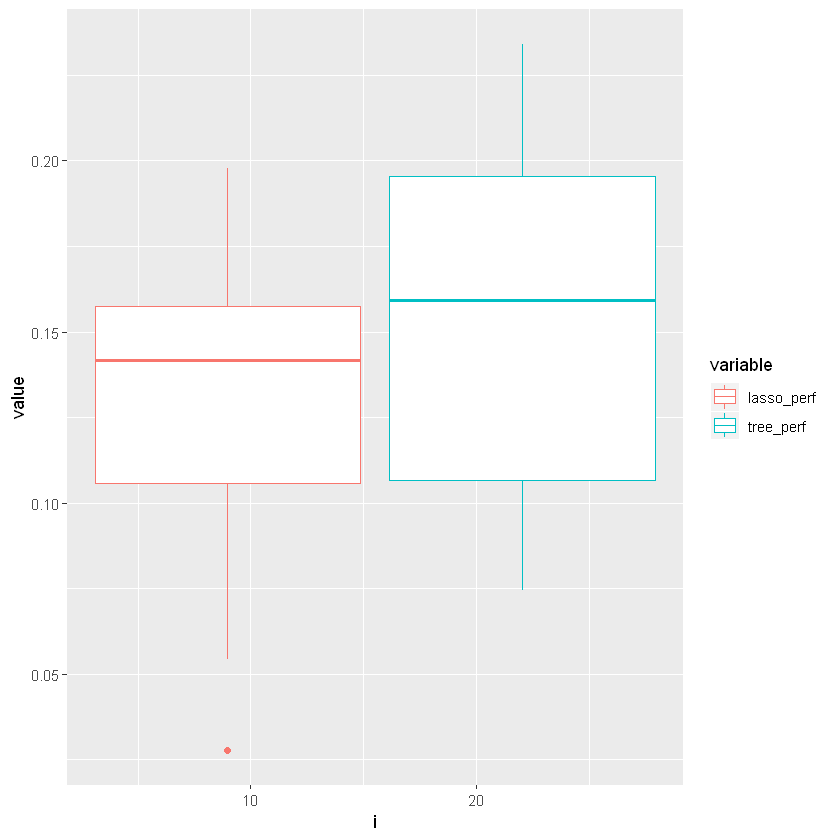

In [17]:
ggplot(long_performance_parameters_dt, aes(x=i, y=value, color = variable))+
geom_boxplot()

We can see from box plot that model with penalty term (fused lasso) has better results than regression trees. 

# 1-NN Classifier

In [18]:
trainclass <- train_data[,1]

### Lasso

In [19]:
euc_dist_lasso <-dist(lasso_best_fit_dt)
euc_dist_lasso <-as.matrix(lasso_best_fit_dt) 
neigh_lasso <- apply(euc_dist_lasso,1,order)
predicted_lasso <- trainclass[neigh_lasso[1,]]
table(trainclass,predicted_lasso)

acc_lasso=sum(trainclass==predicted_lasso)/length(predicted_lasso)
print(acc_lasso)

                  predicted_lasso
trainclass         c("1", NA, "3")
  c("1", "2", "3")               0

[1] NA


### Tree

In [20]:
euc_dist_tree <-dist(prediction_dt)
euc_dist_tree <-as.matrix(prediction_dt) 
neigh_tree <- apply(euc_dist_tree,1,order)
predicted_tree <- trainclass[neigh_tree[1,]]
table(trainclass,predicted_tree)

acc_tree=sum(trainclass==predicted_tree)/length(predicted_tree)
print(acc_tree)

                  predicted_tree
trainclass         c(NA, "1", "2", "3")
  c("1", "2", "3")                    0

[1] NA


# Graph Plots

## Fused Lasso Graphs

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


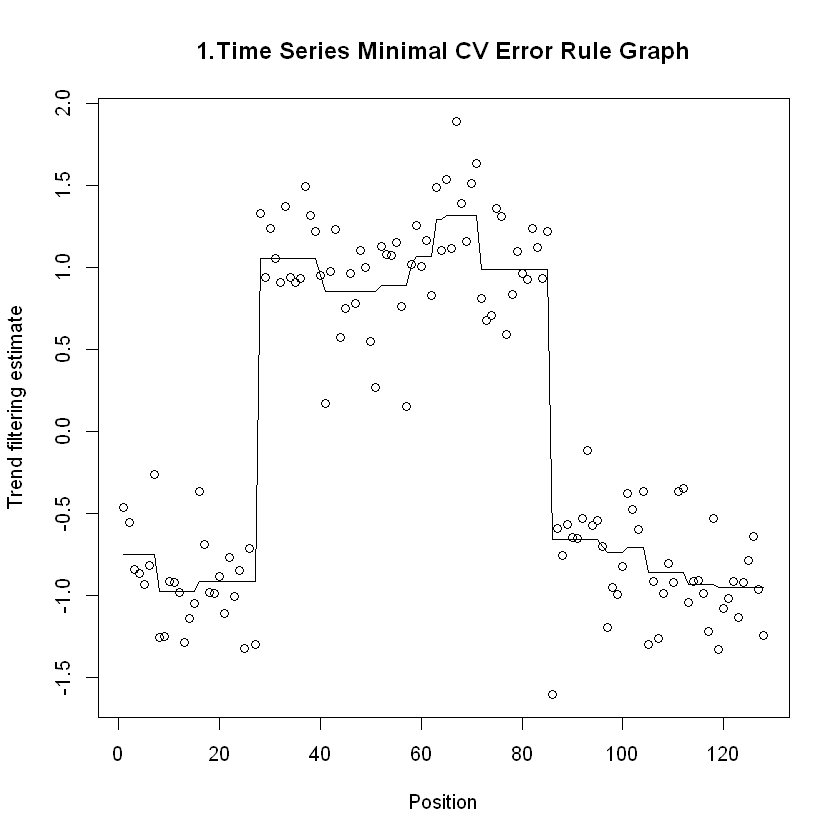

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


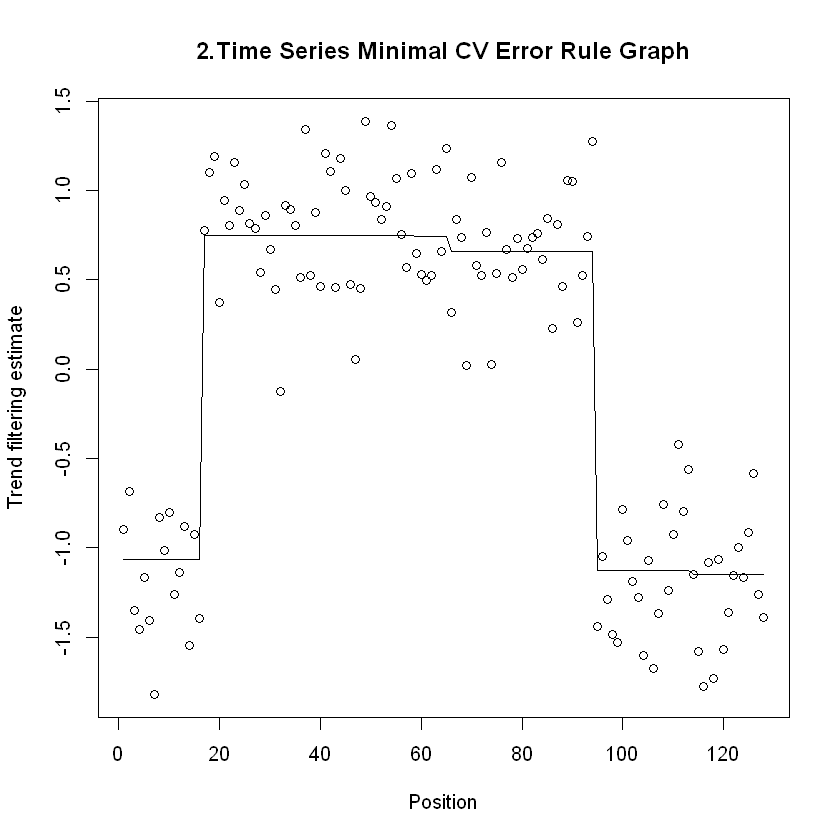

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


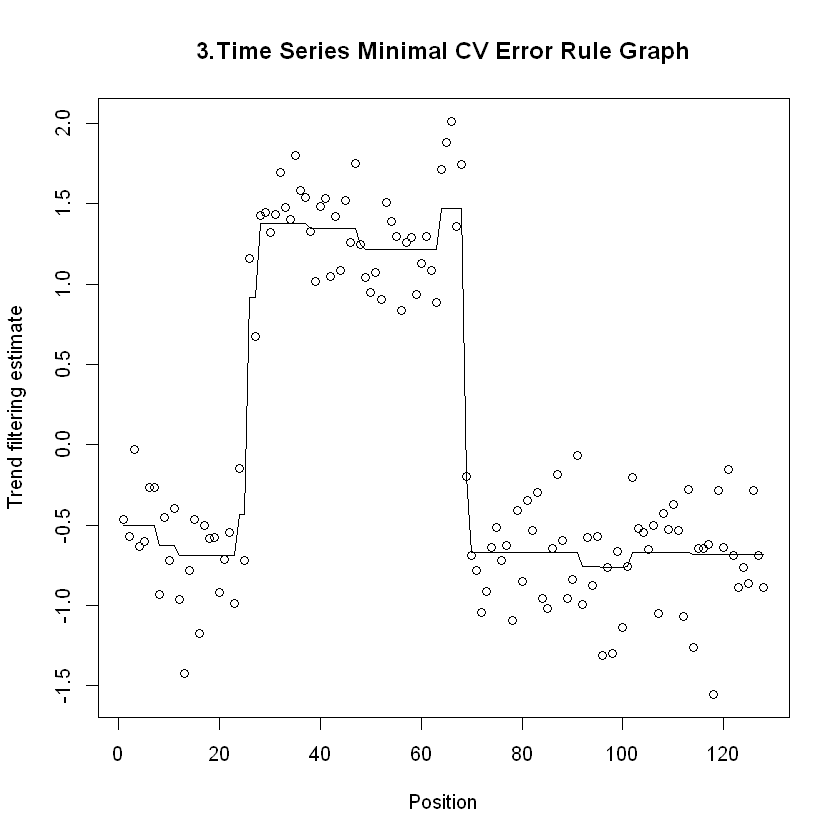

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


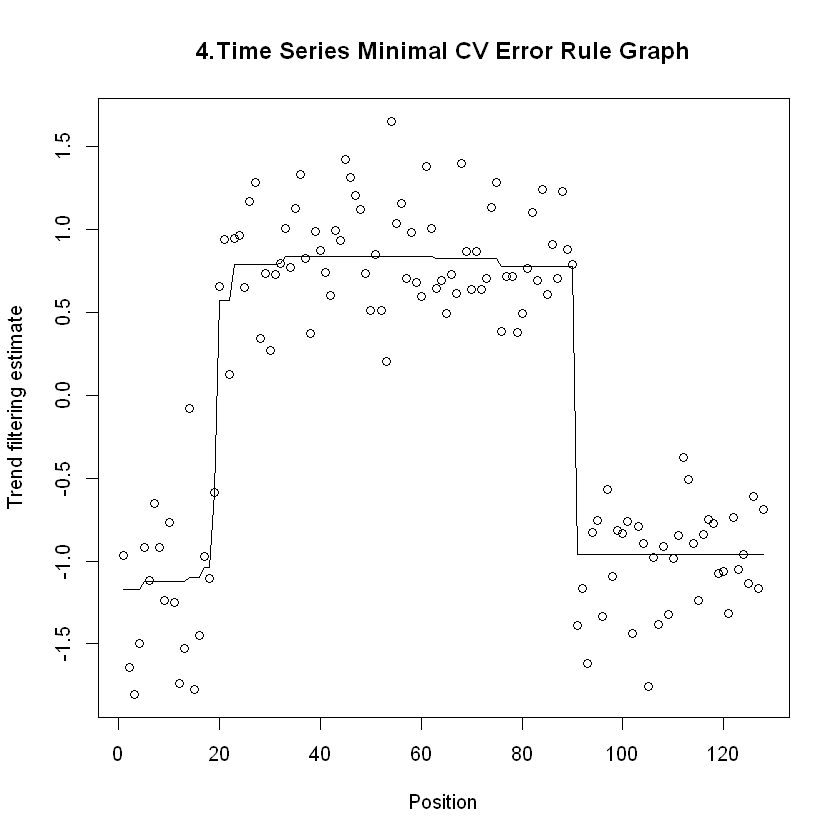

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


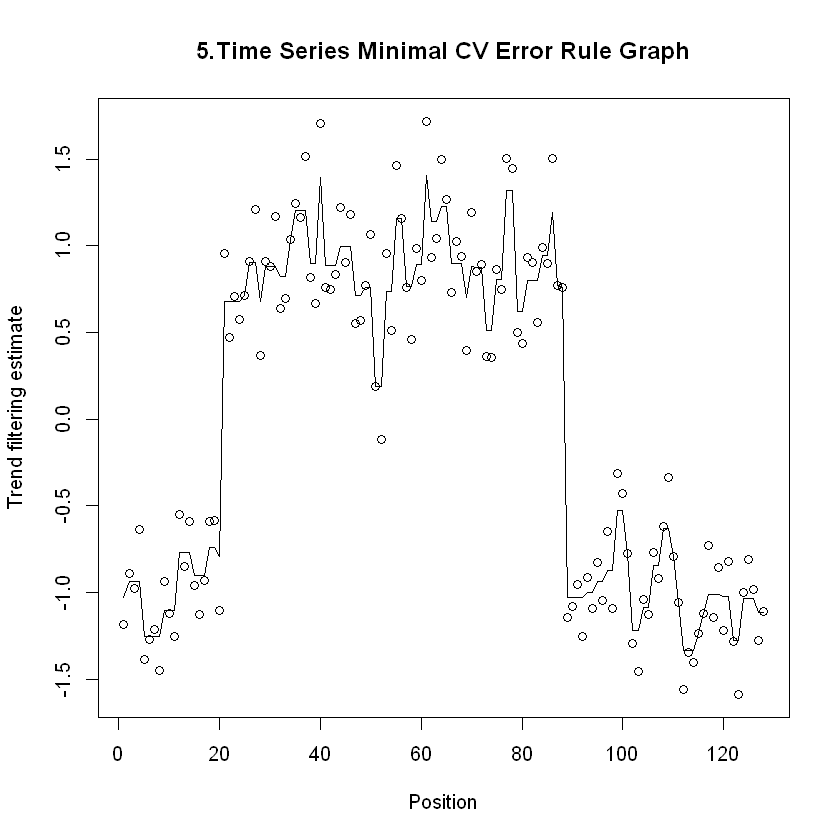

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


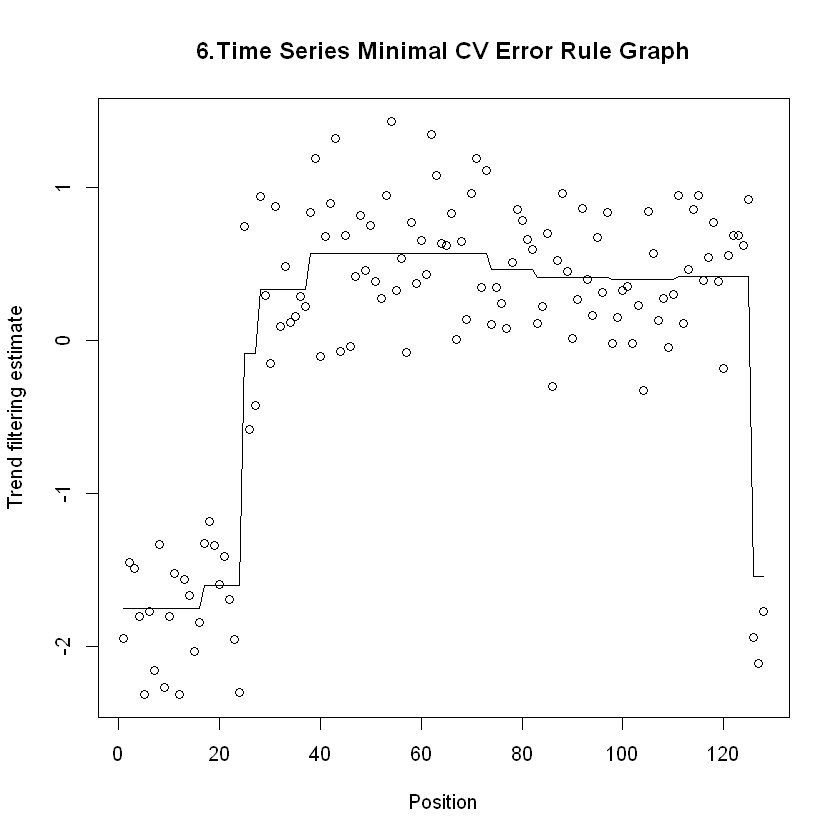

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


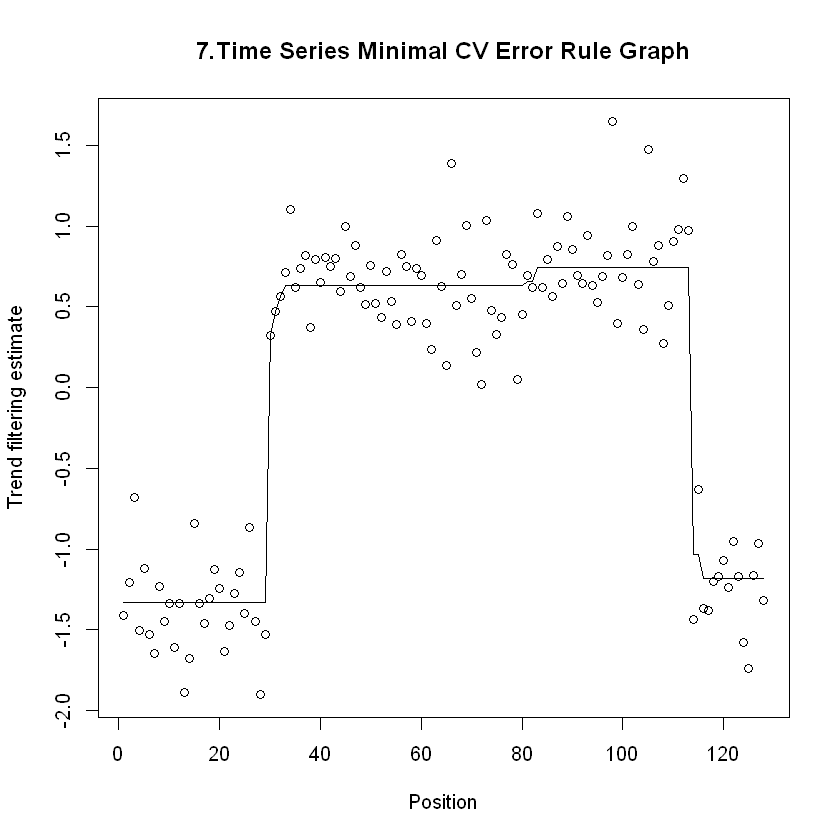

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


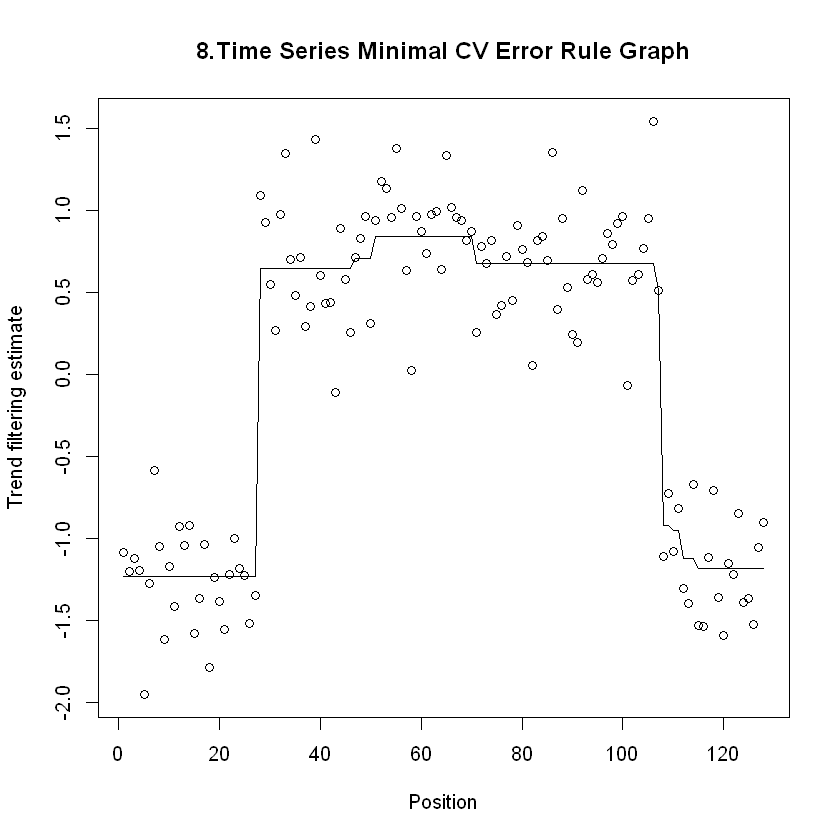

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


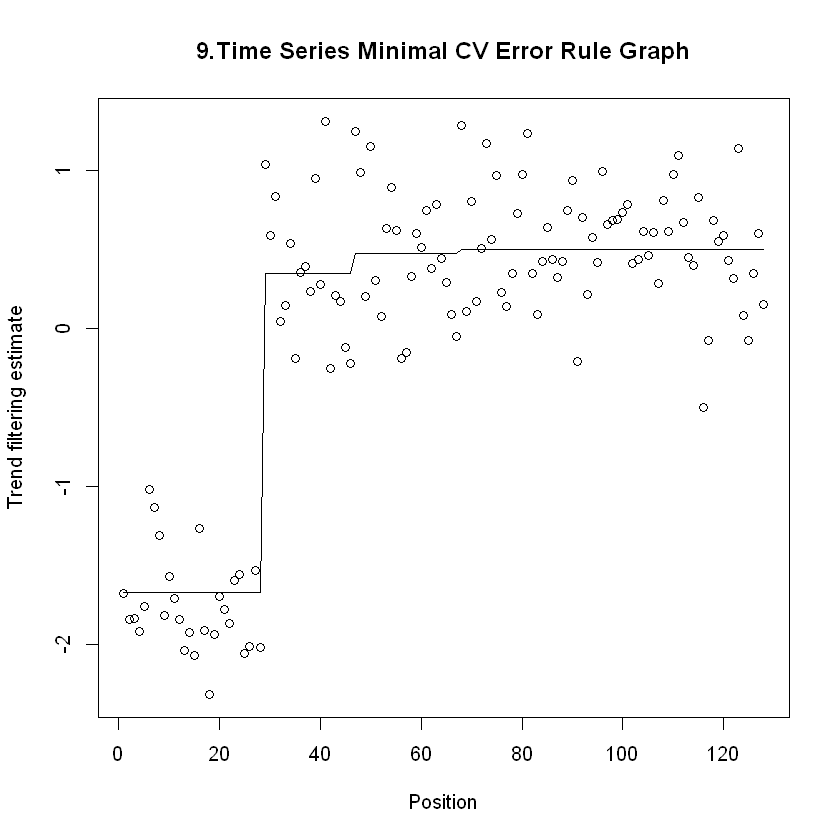

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


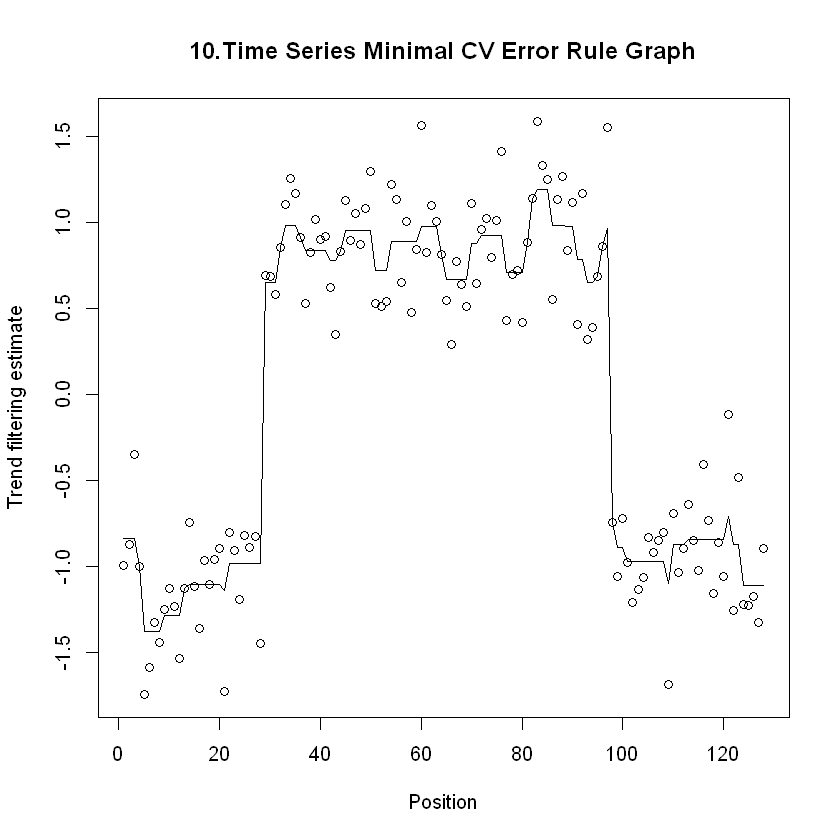

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


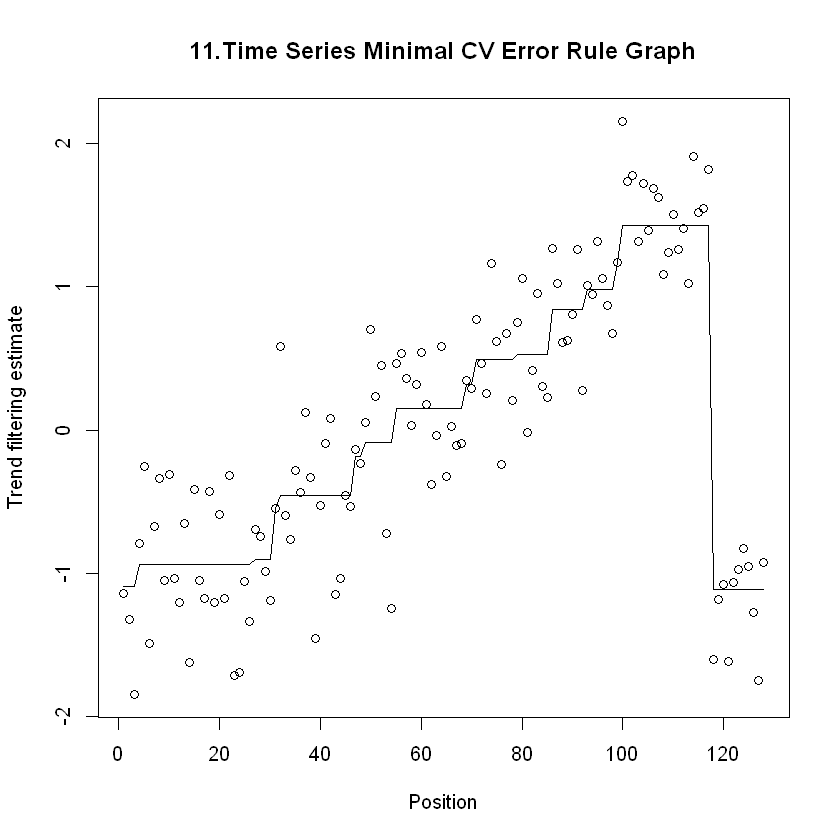

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


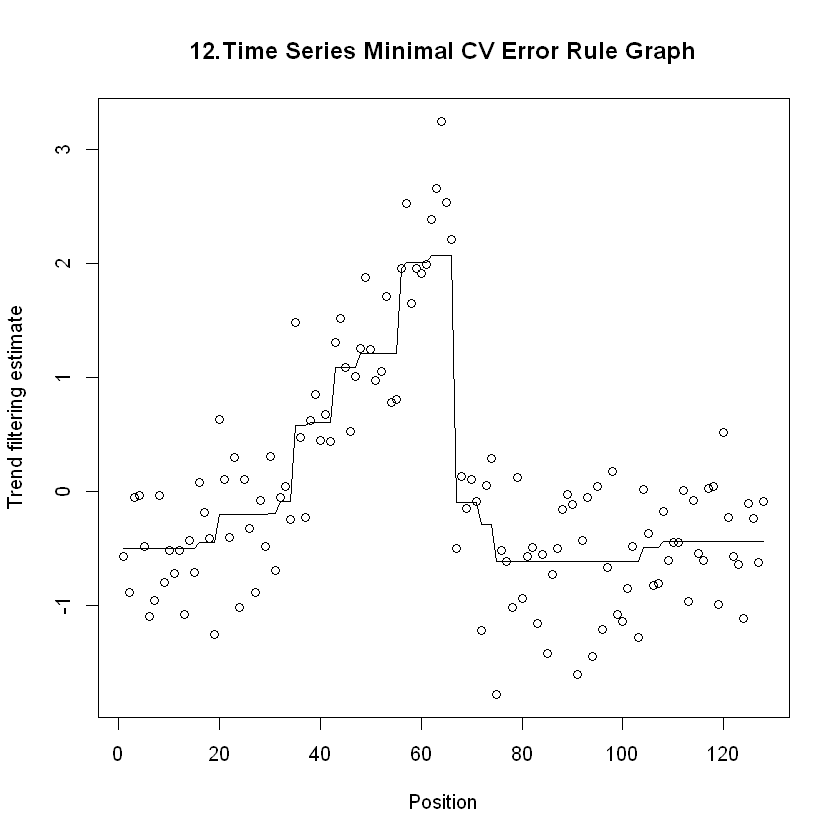

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


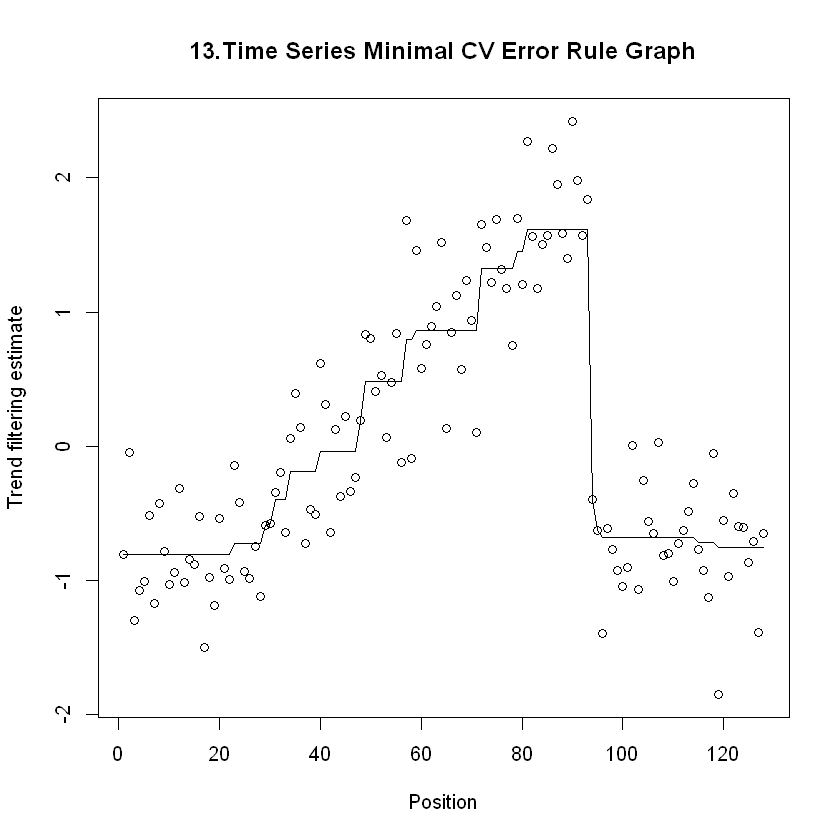

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


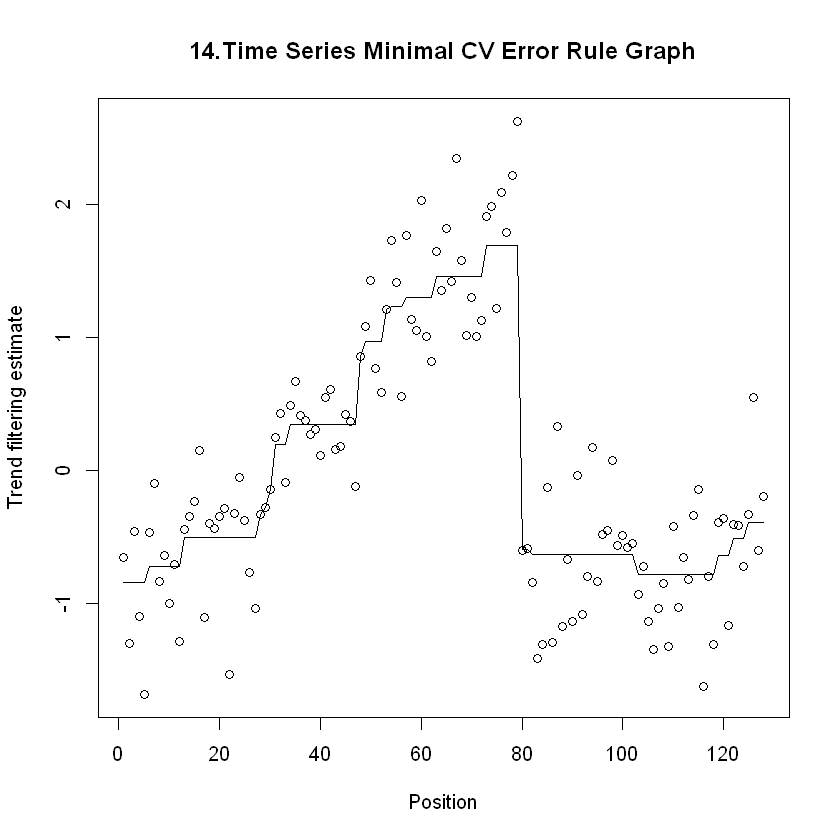

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


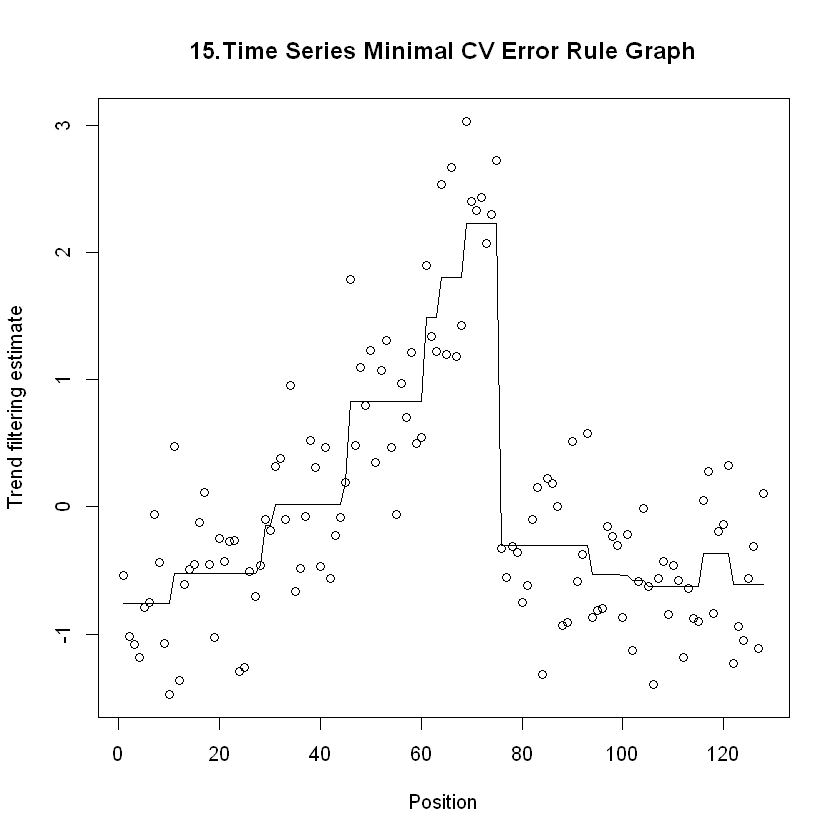

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


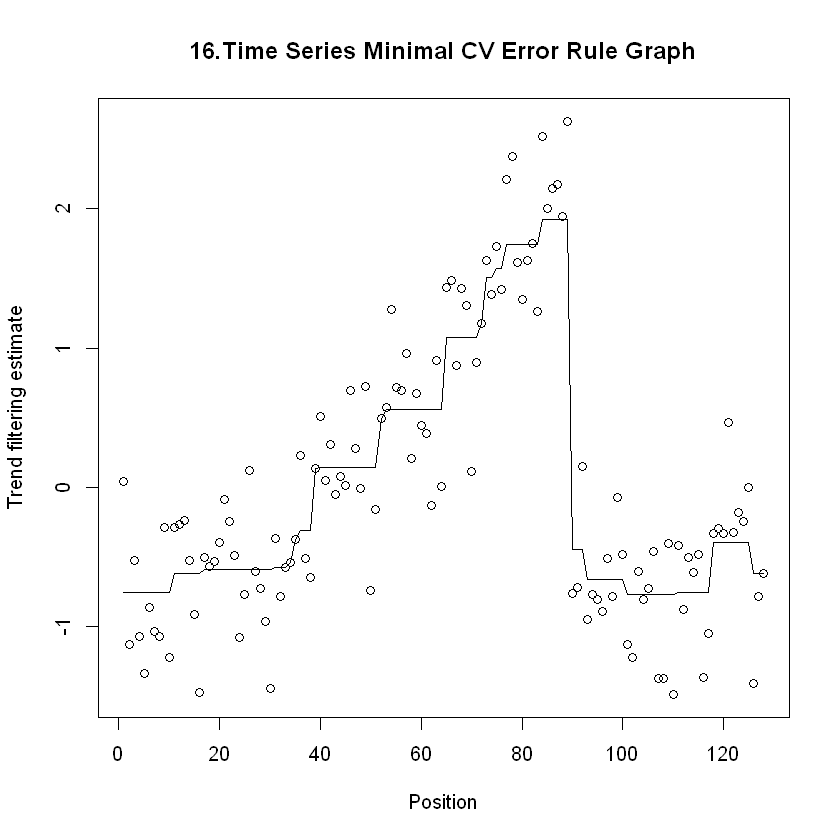

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


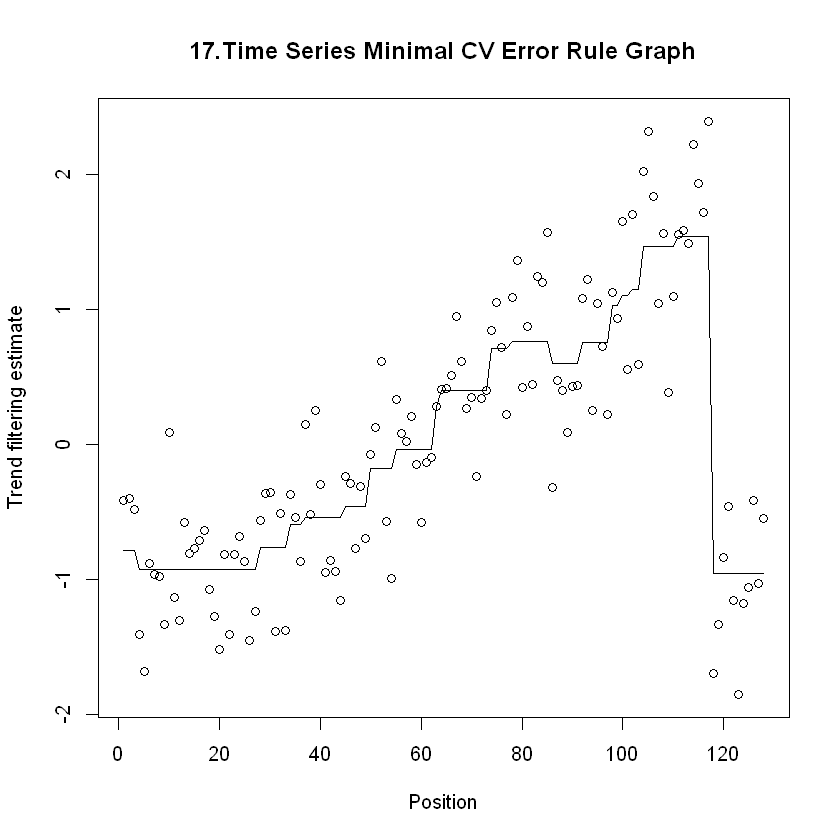

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


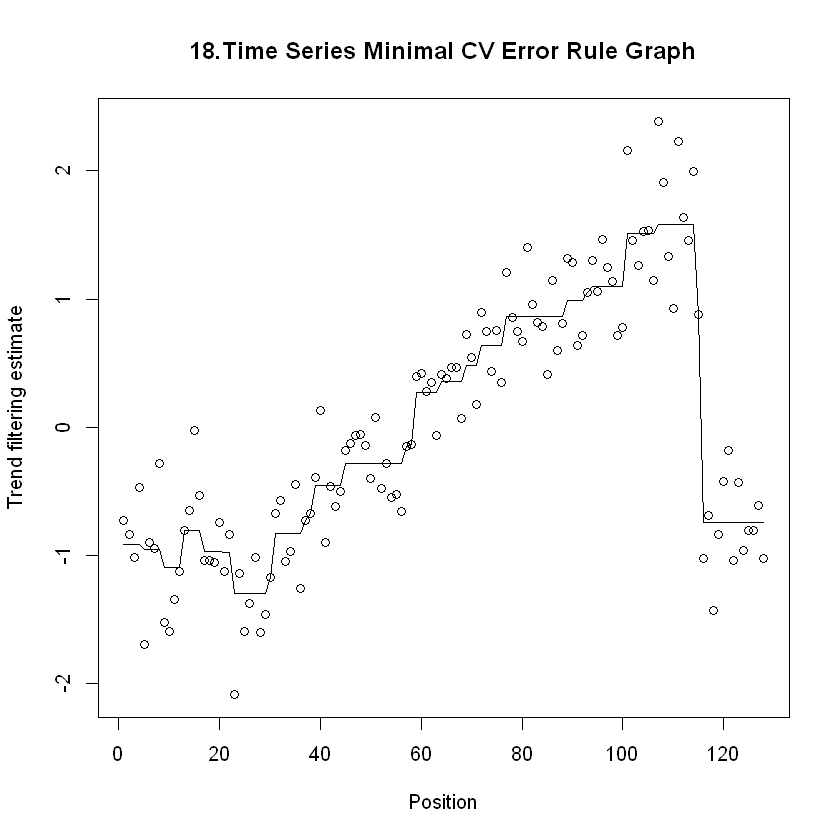

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


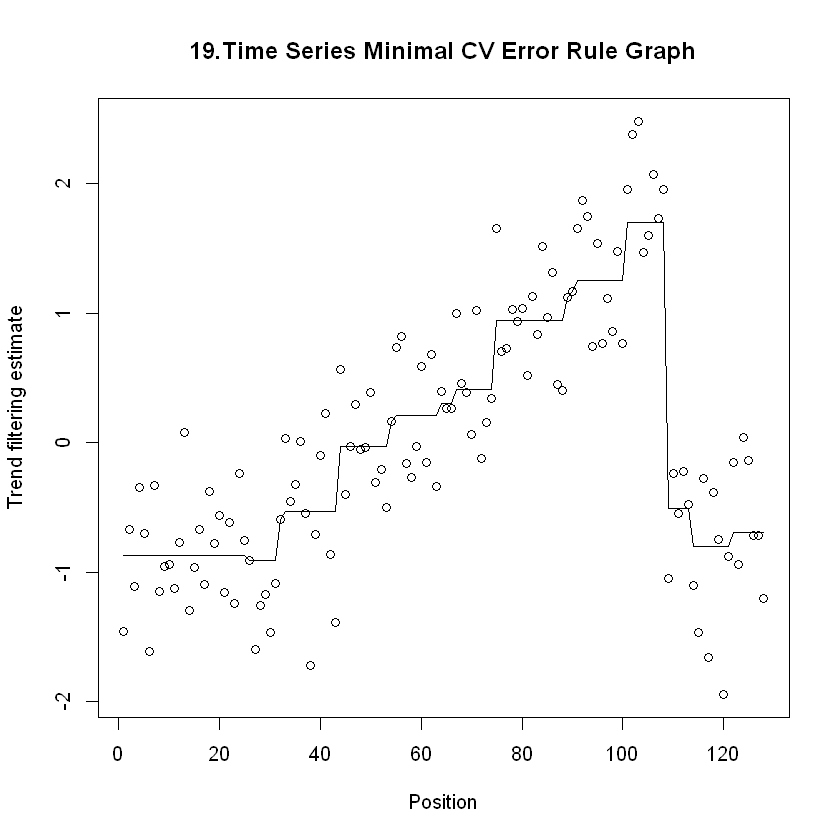

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


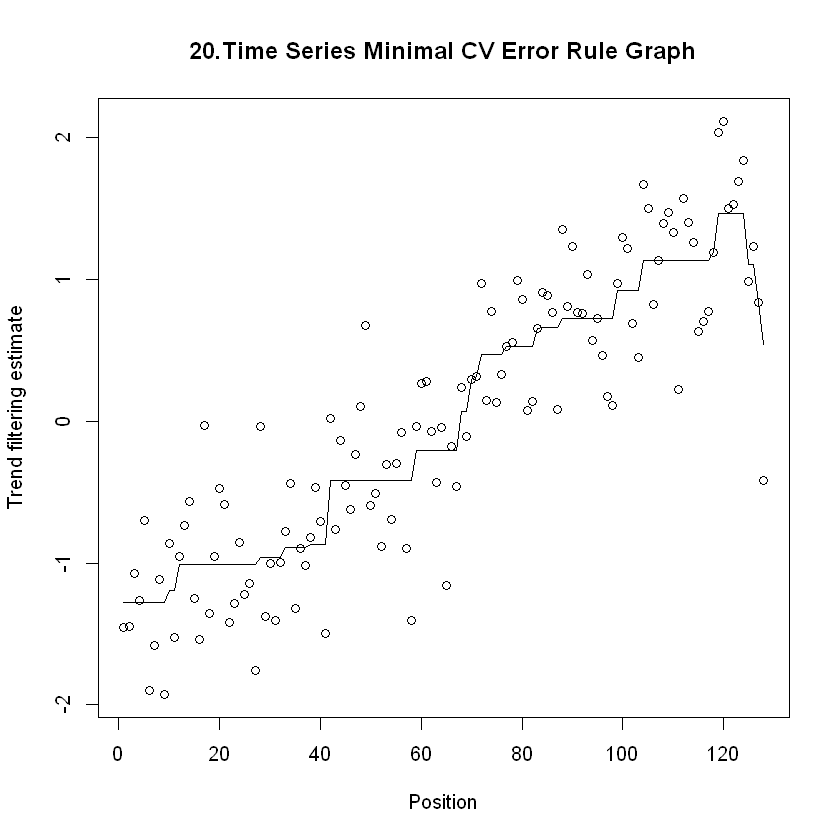

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


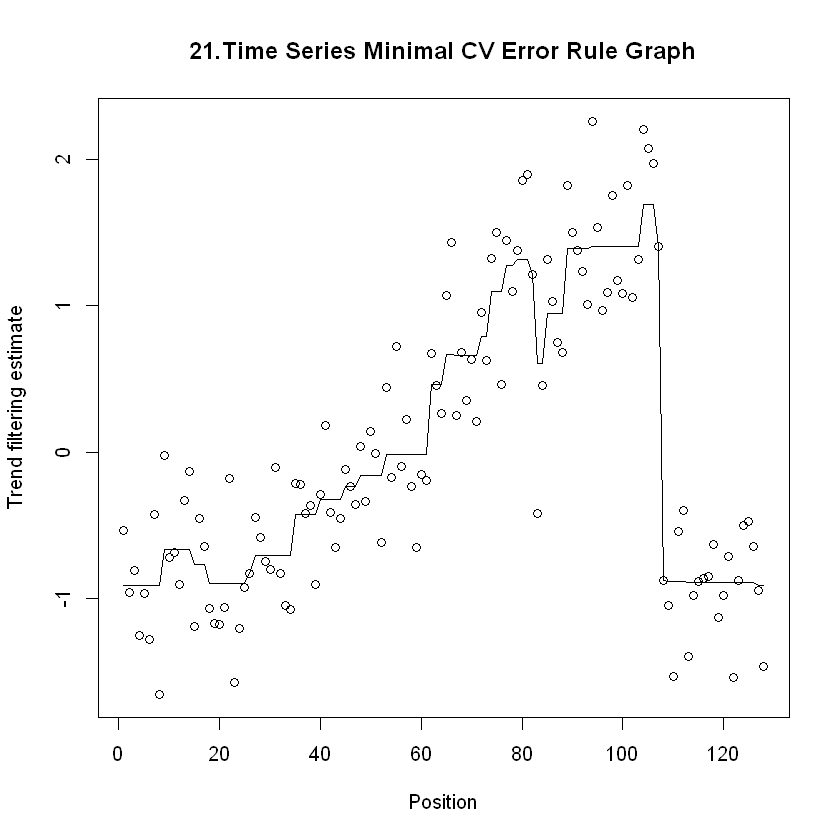

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


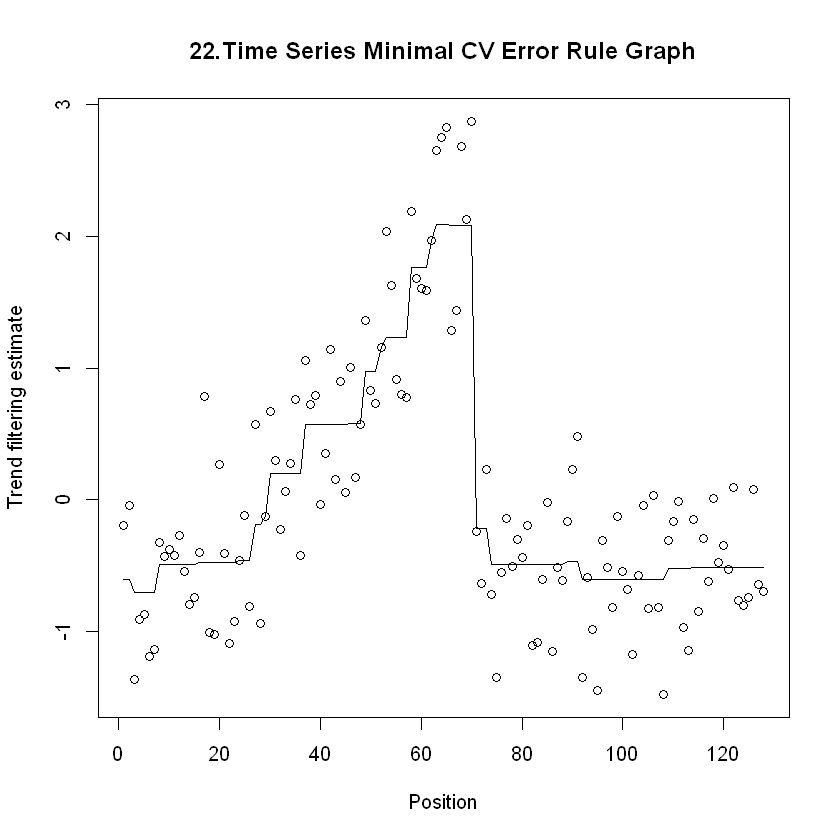

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


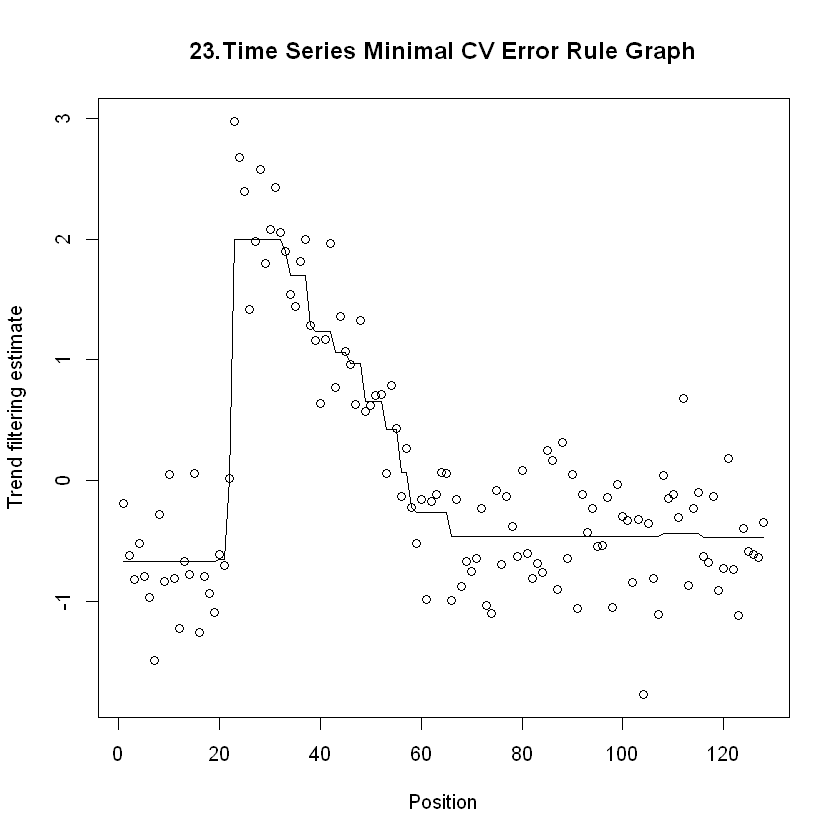

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


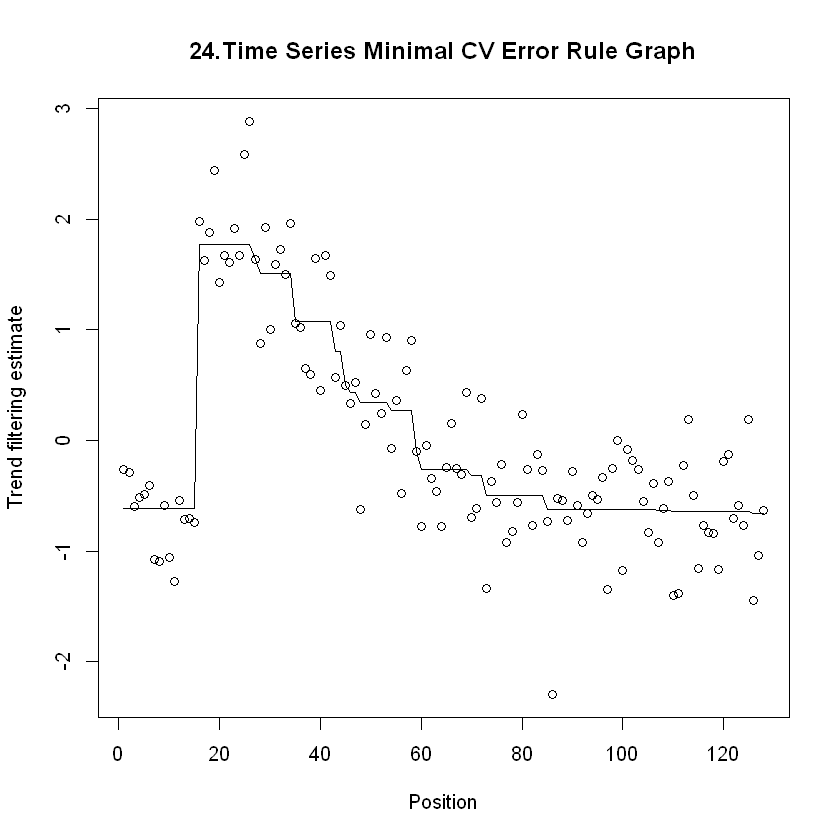

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


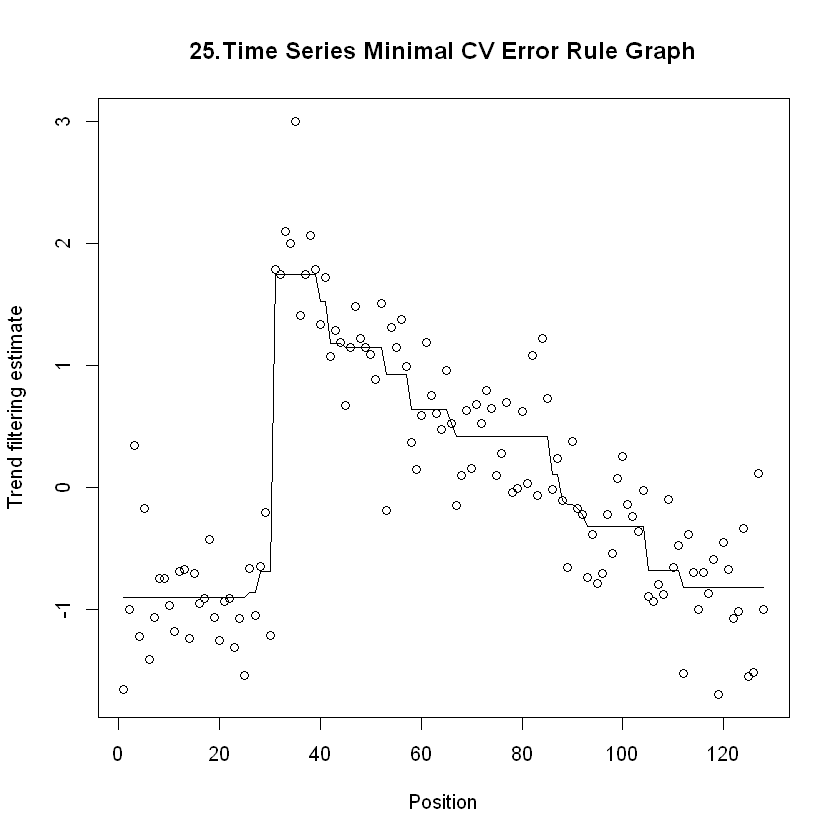

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


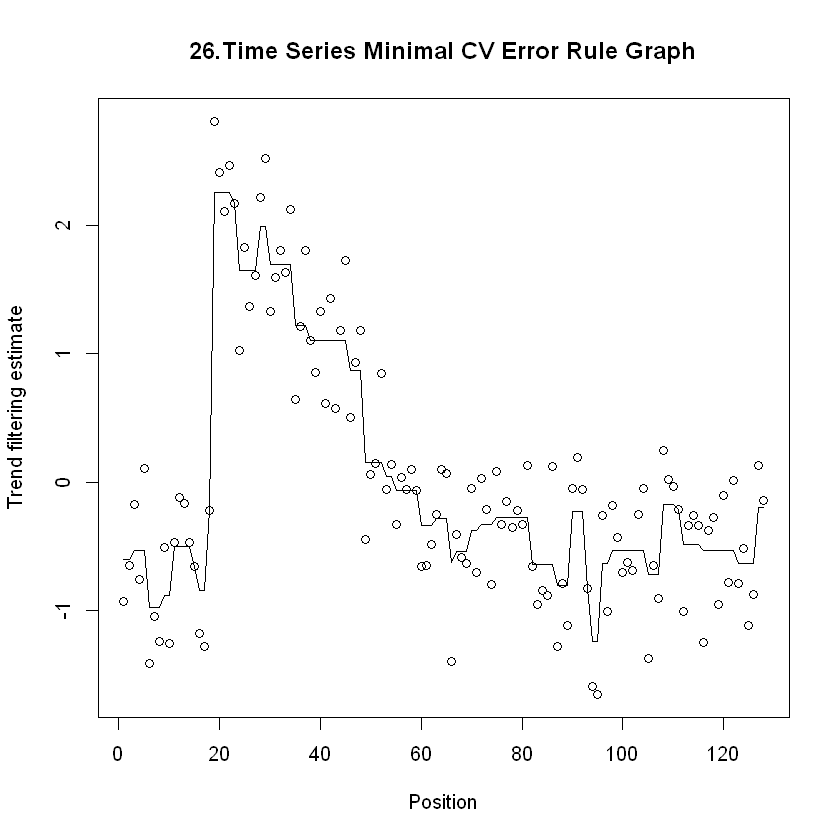

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


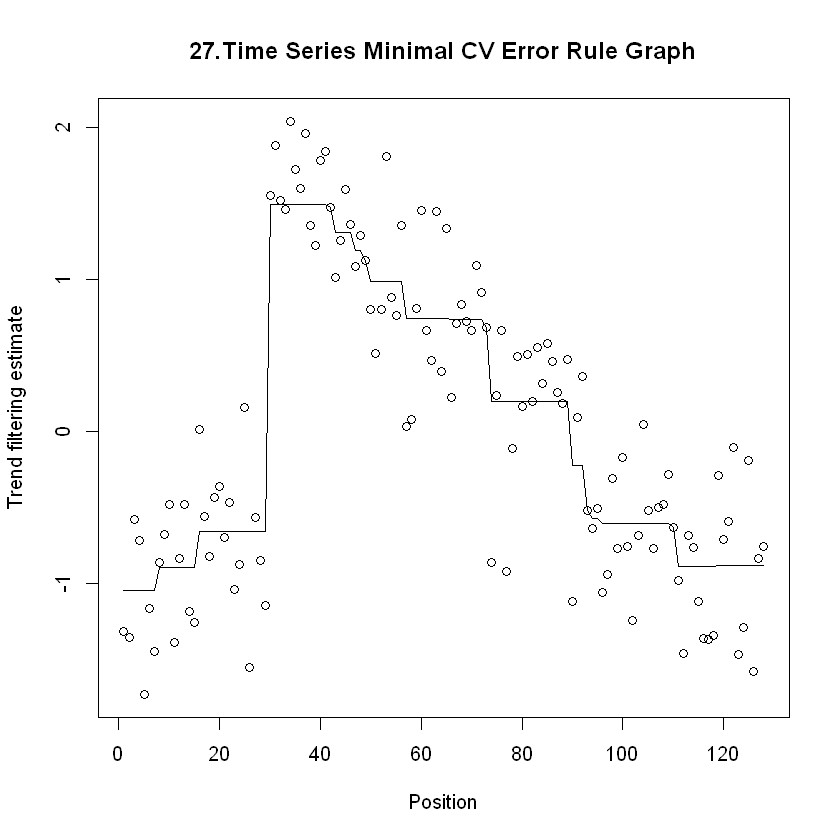

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


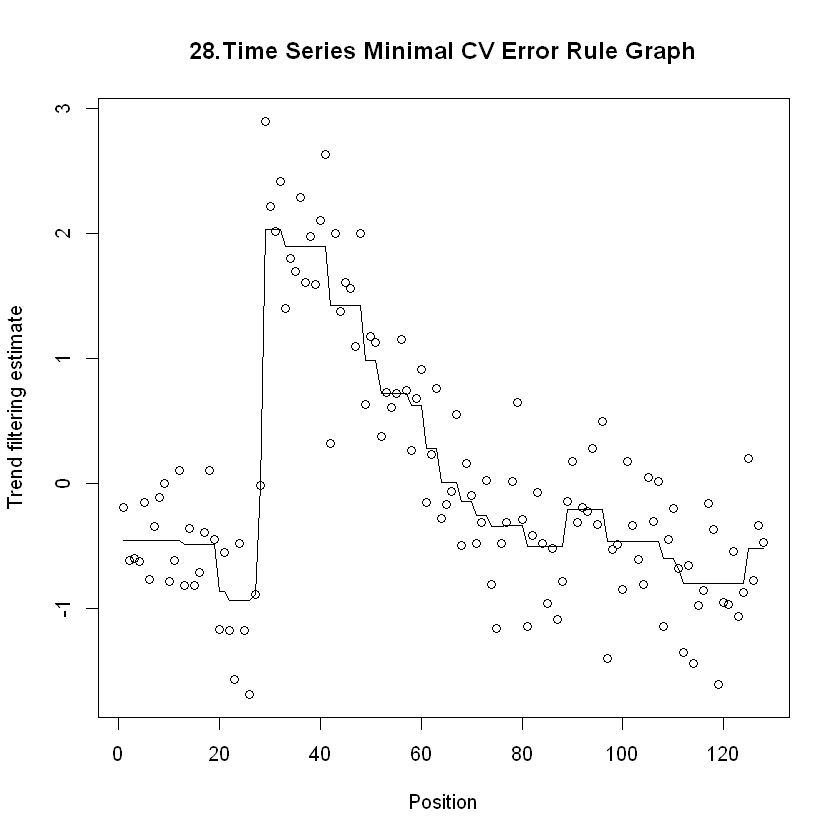

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


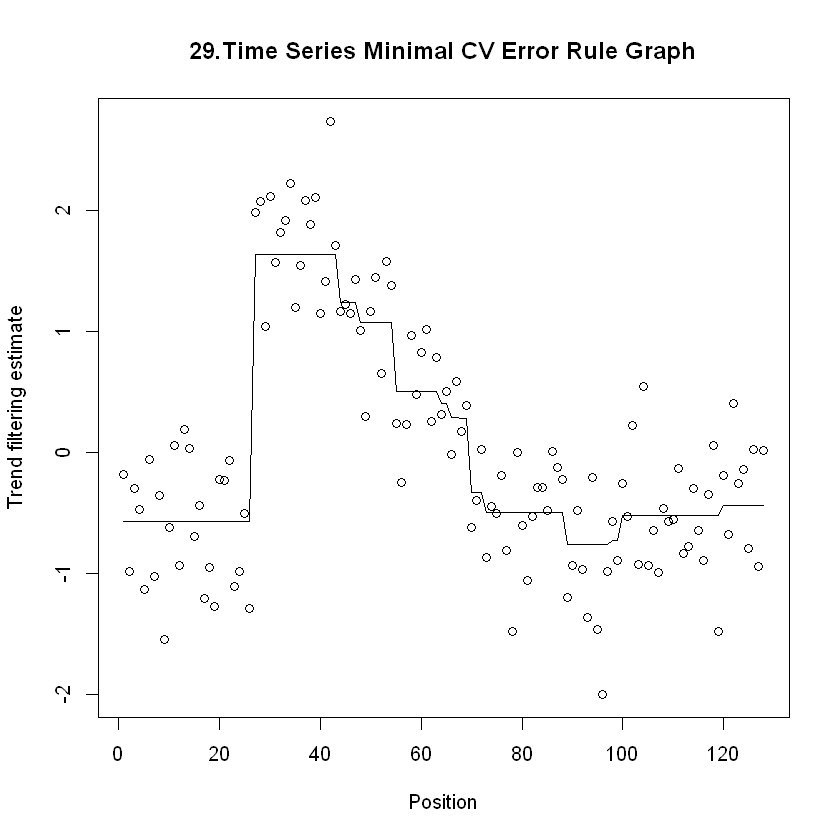

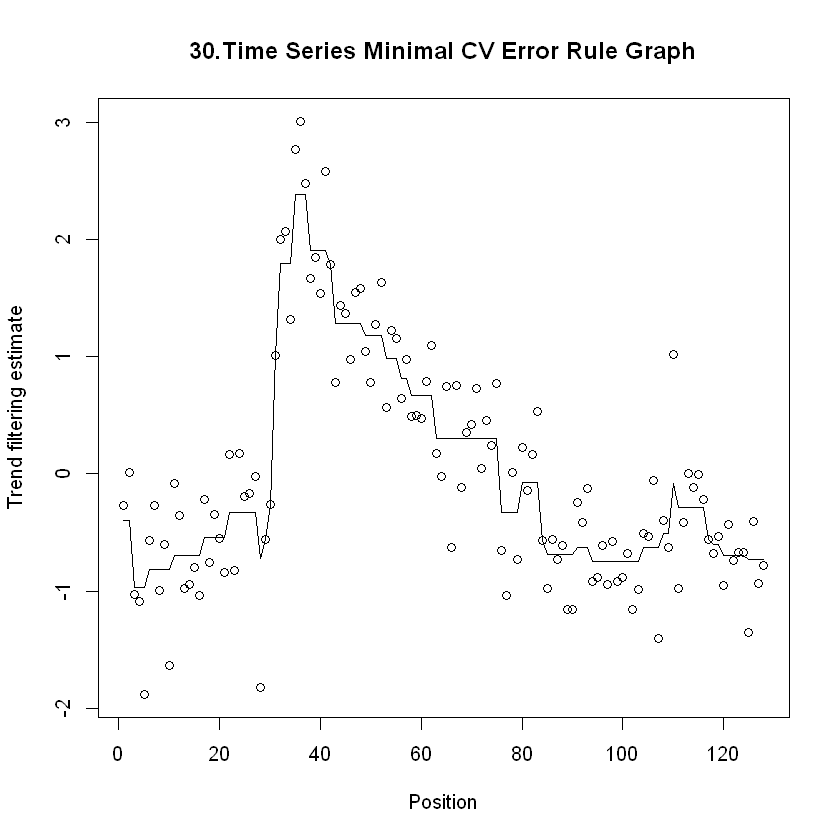

In [23]:
for(i in 1:30){
  selected_dt <- long_train[id == i]
  selected_dt <- as.matrix(selected_dt[,4], rownames=FALSE)
  flasso <- trendfilter(selected_dt, ord=0)
  cv <- cv.trendfilter(flasso)
     
   plot(flasso, lambda=cv$lambda.min, main=paste0(i,".Time Series Minimal CV Error Rule Graph"))
  
  
}



## Tree Graphs

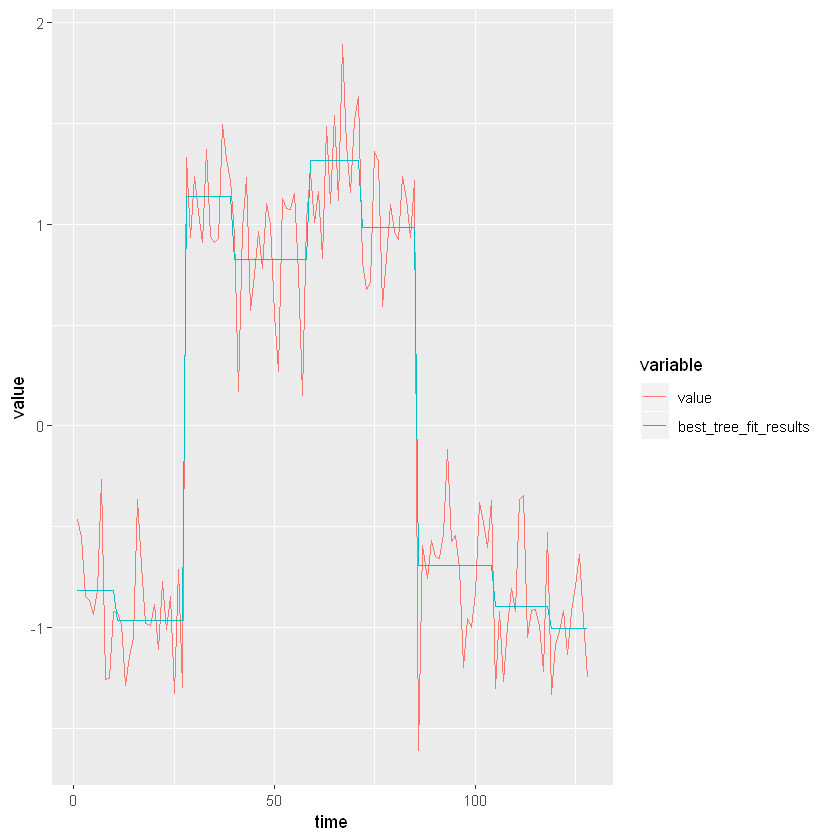

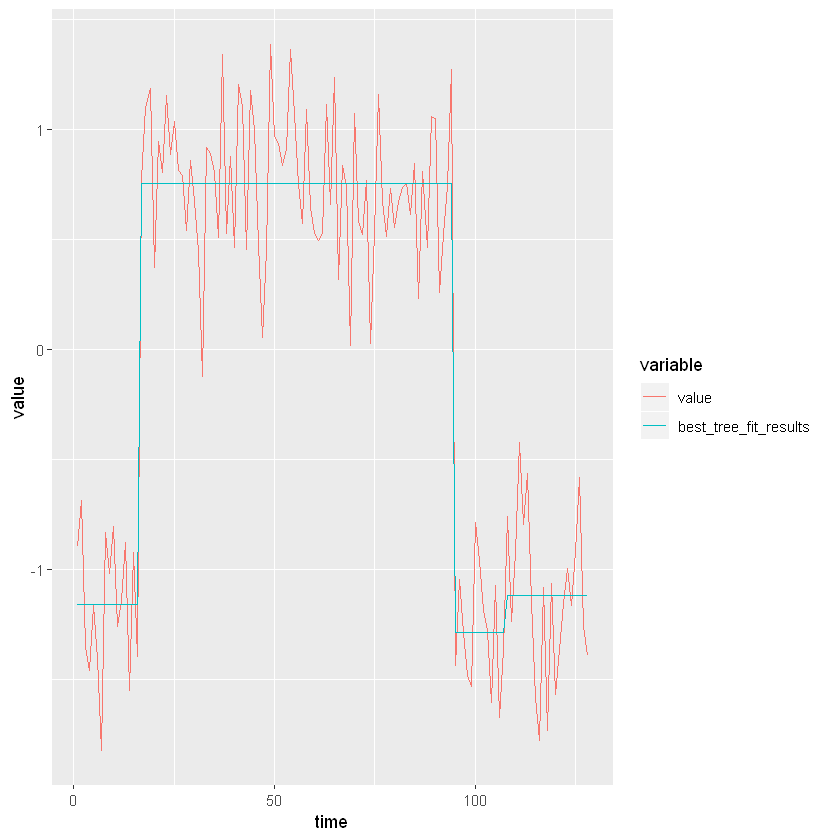

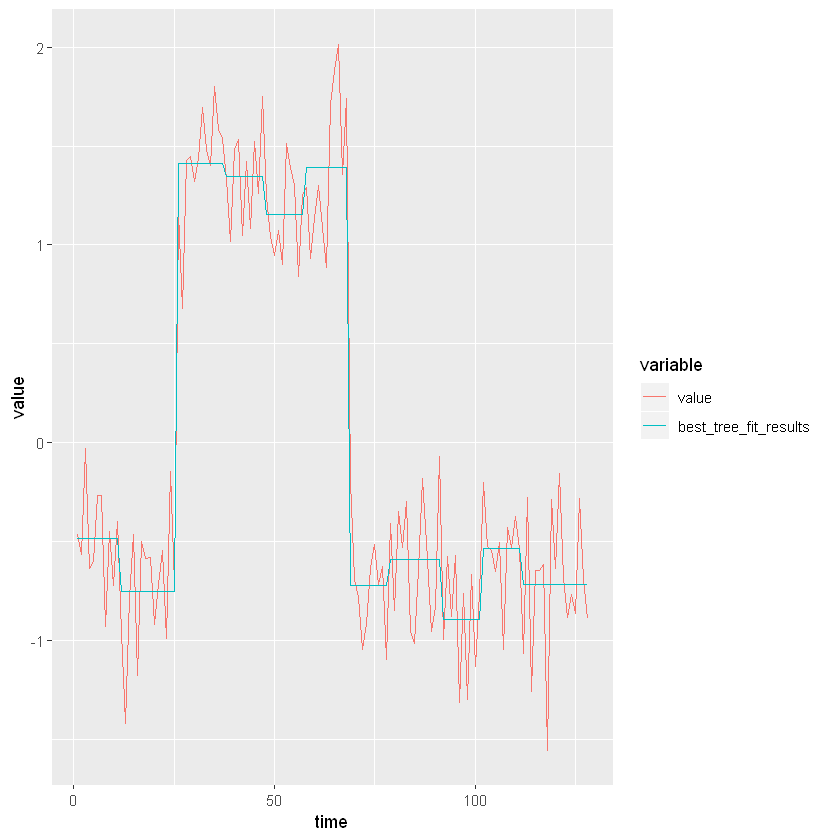

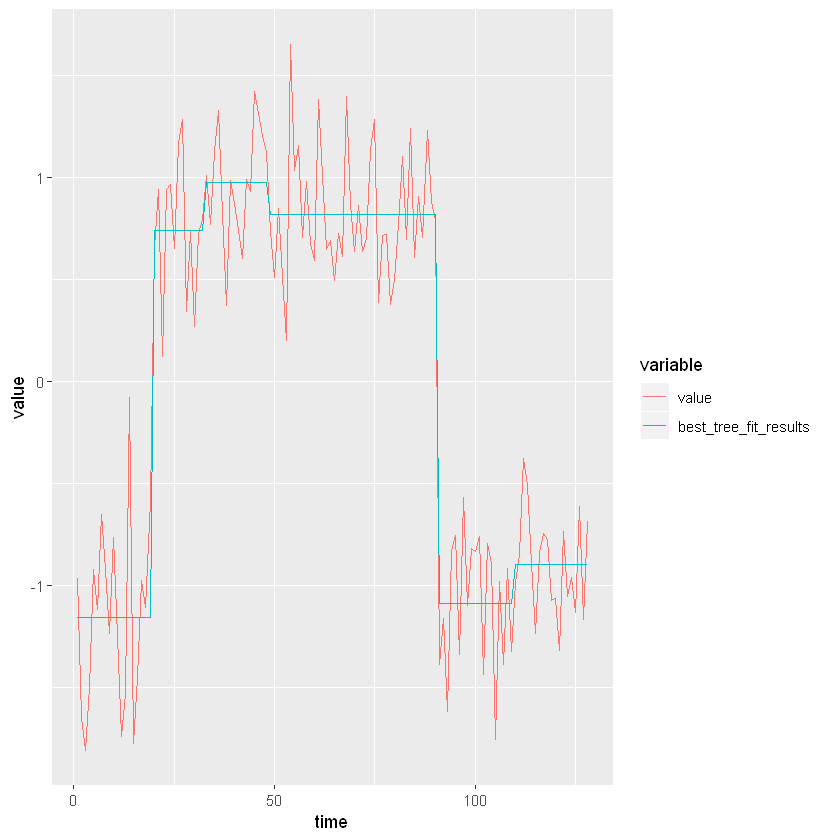

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."

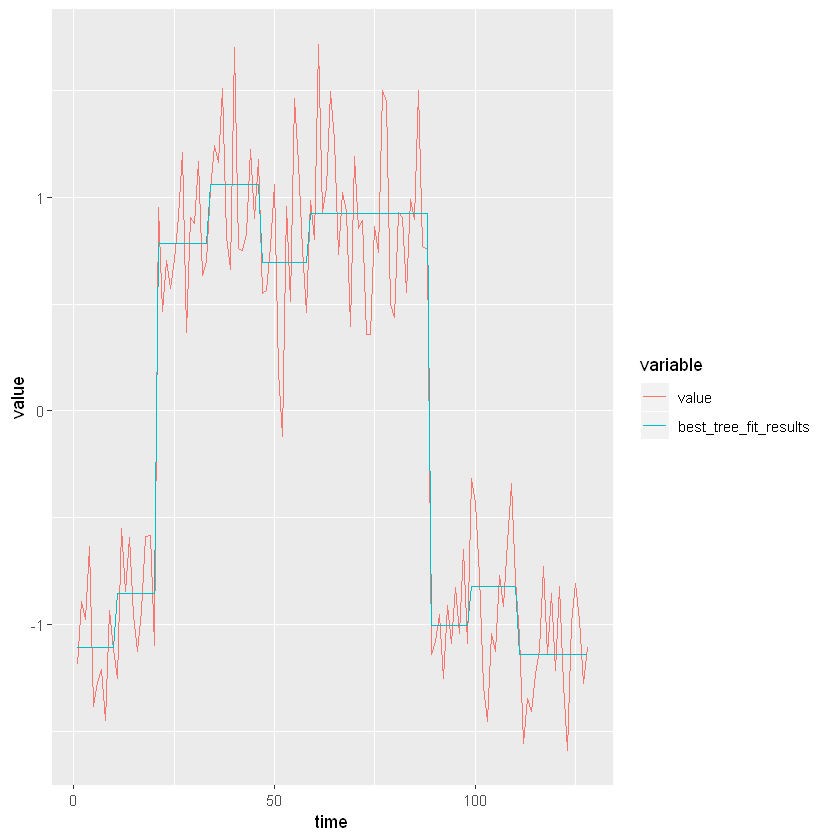

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."

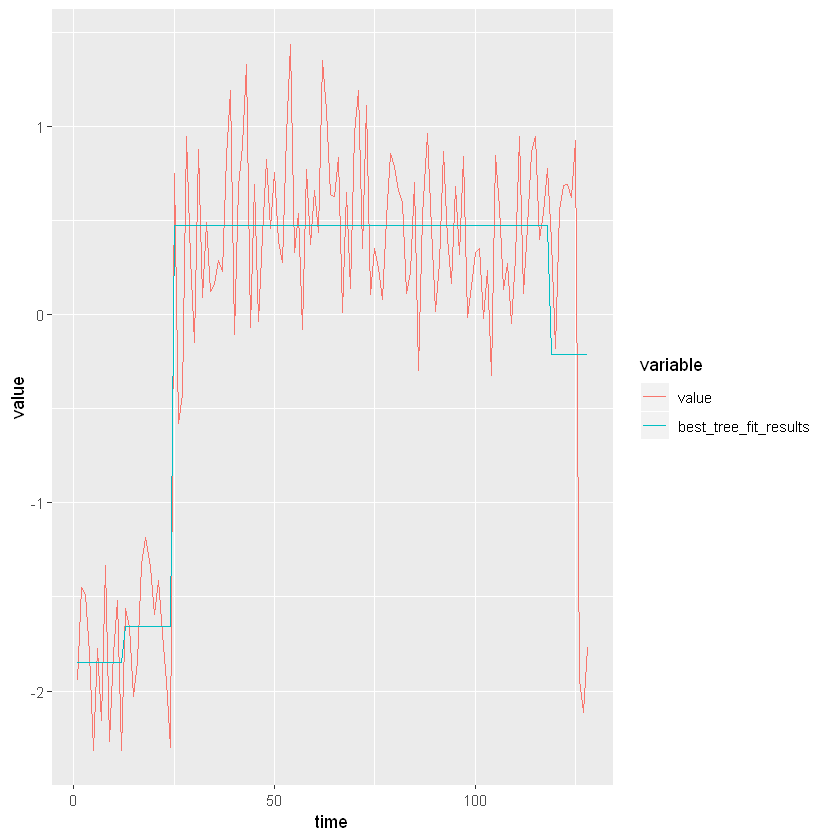

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."

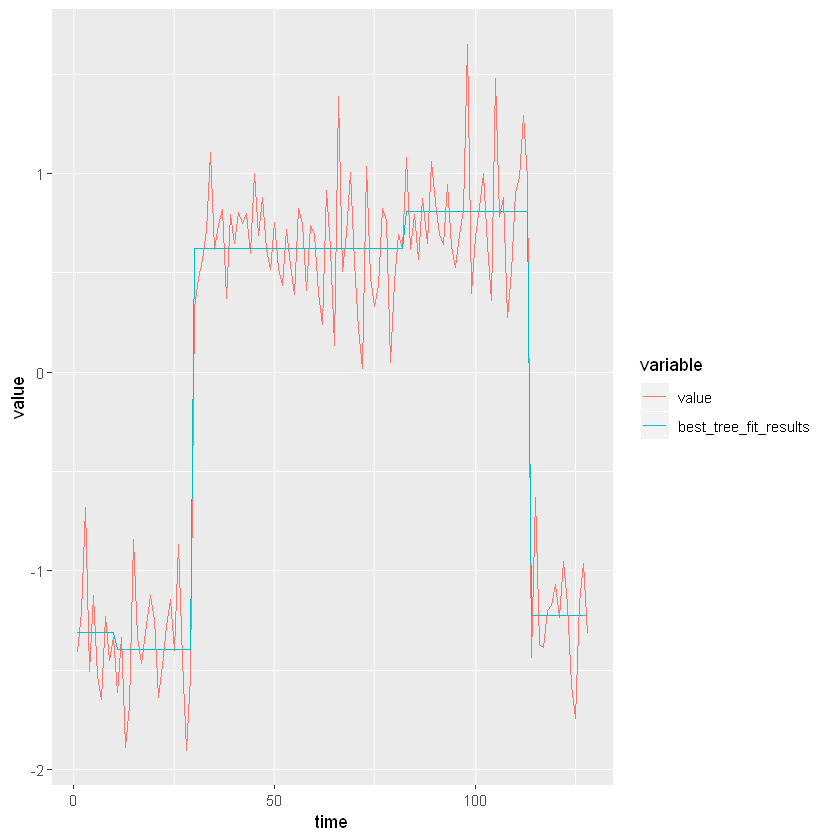

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."

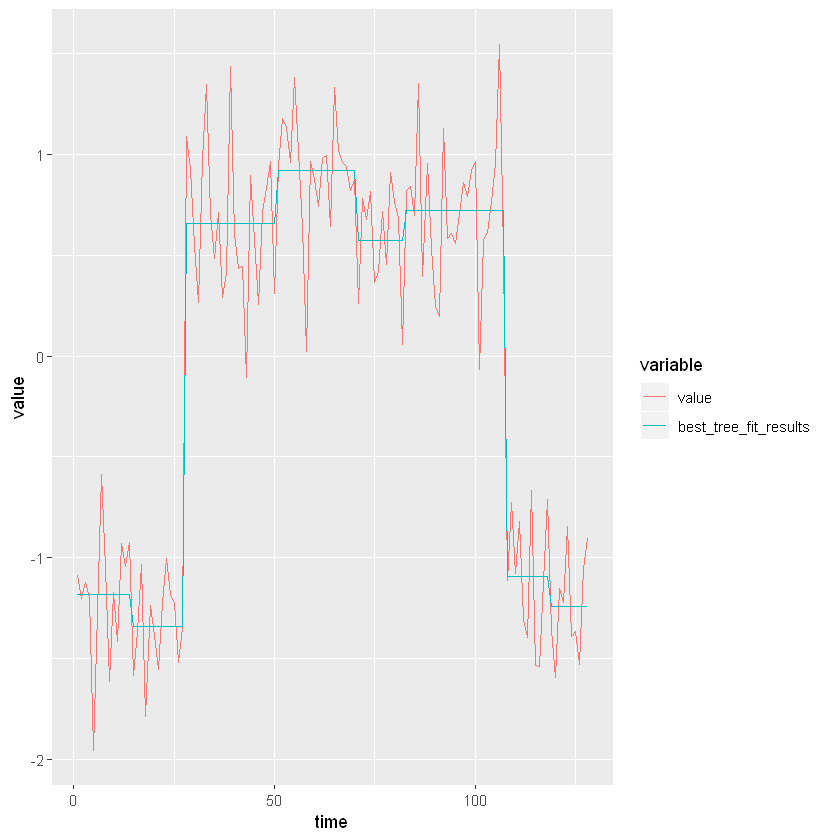

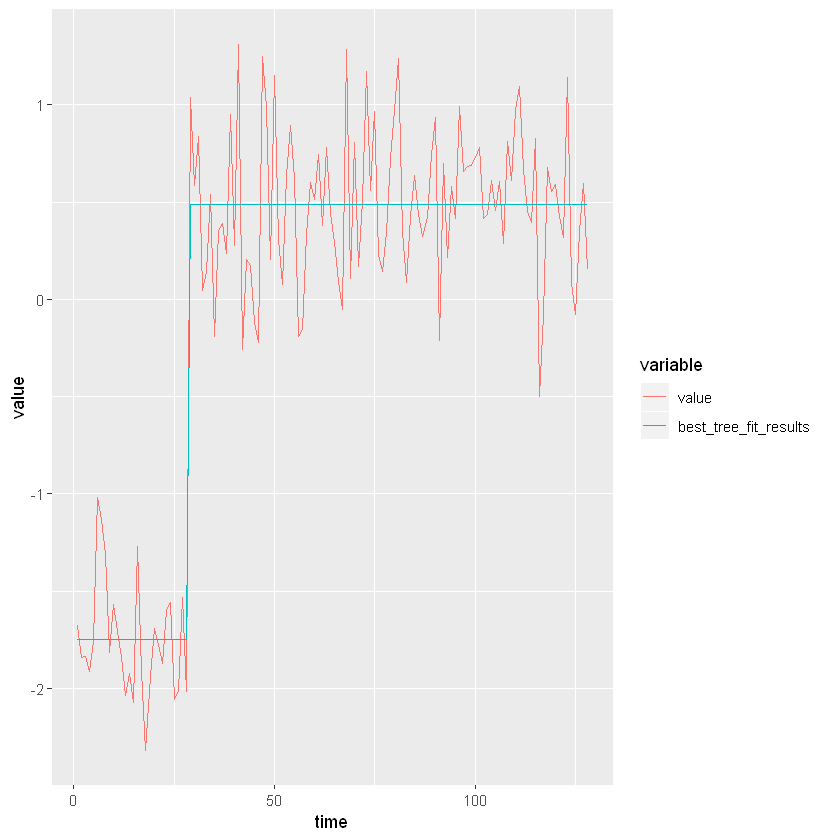

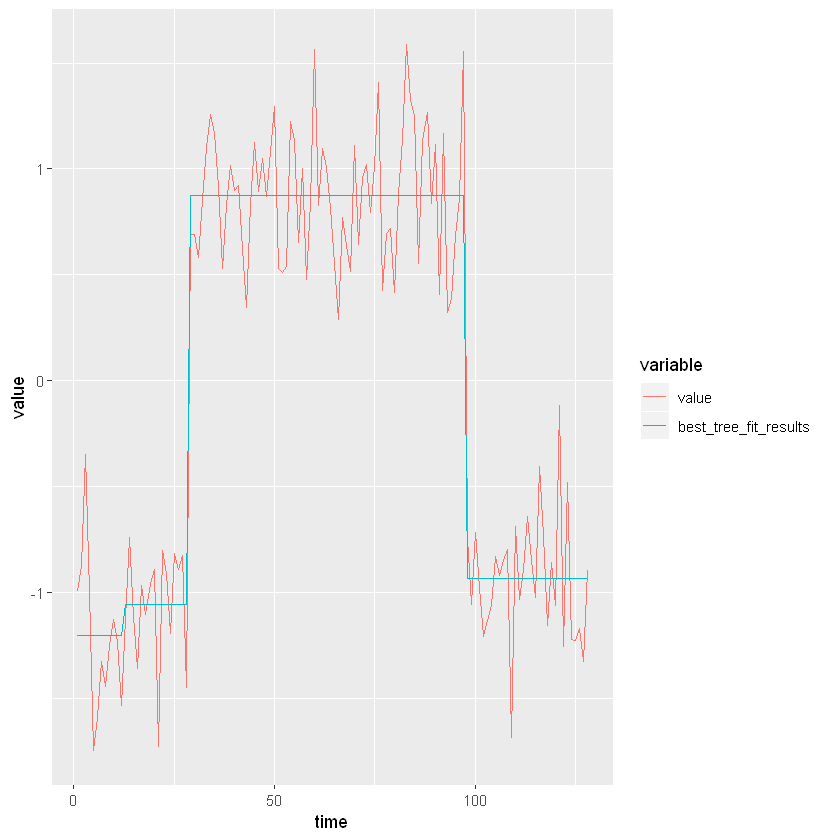

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."

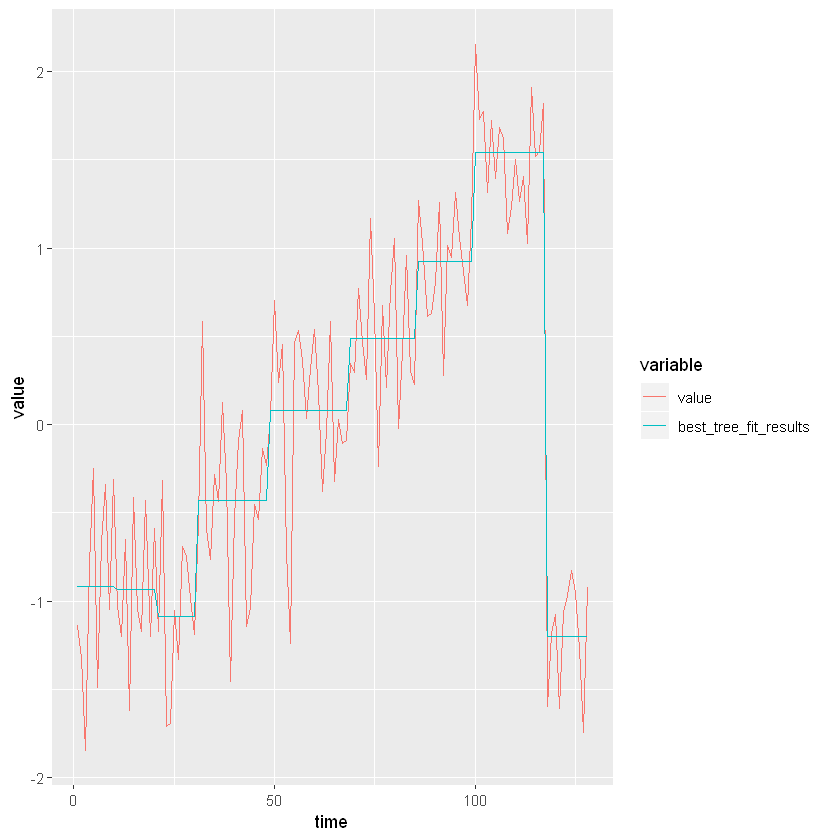

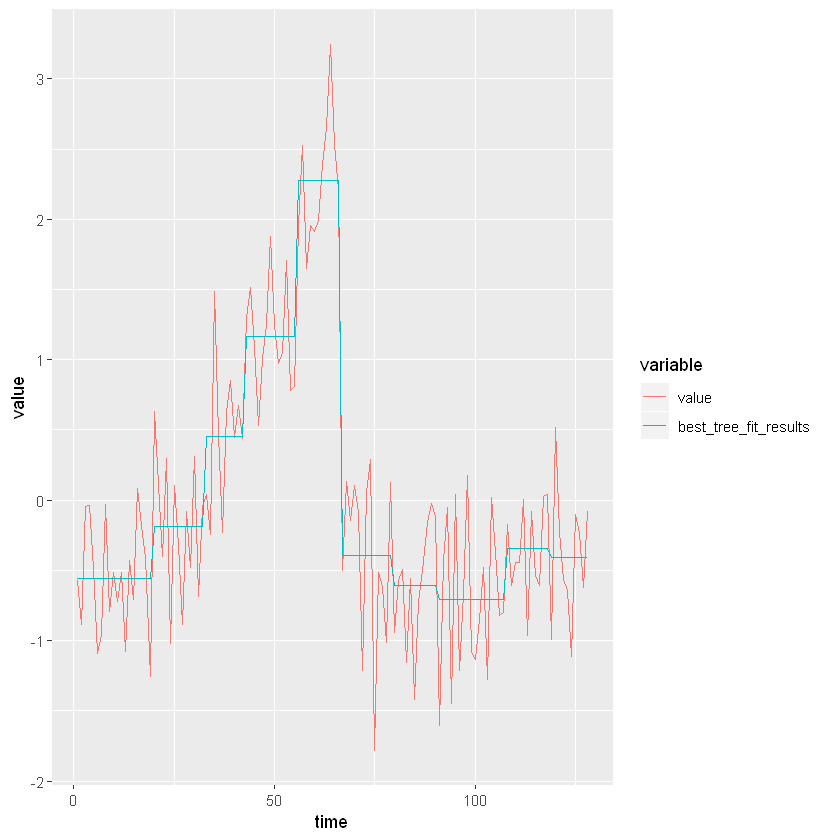

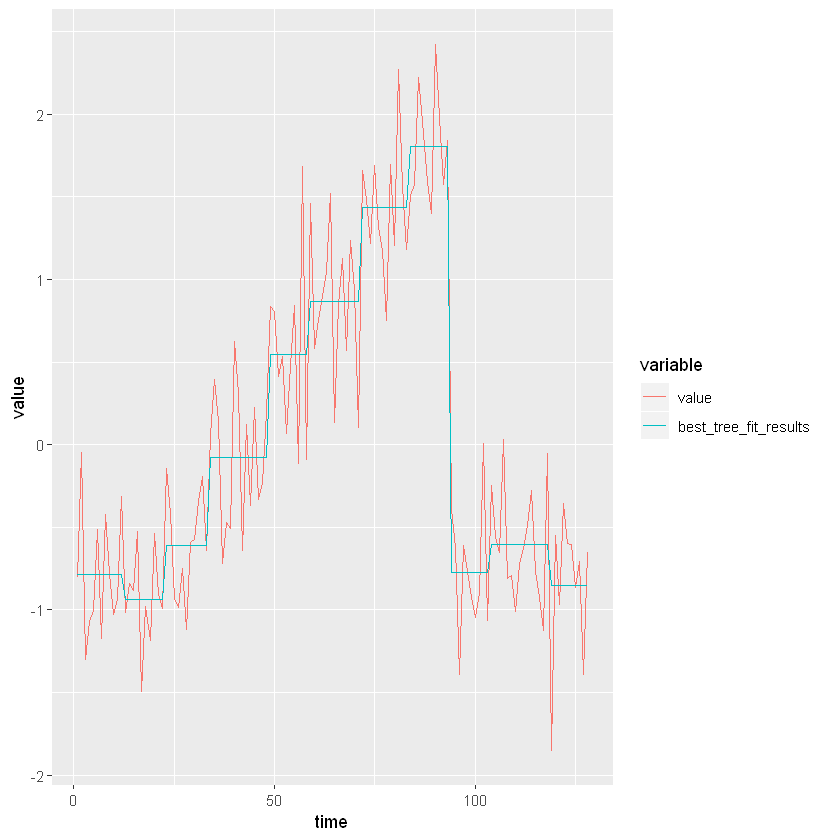

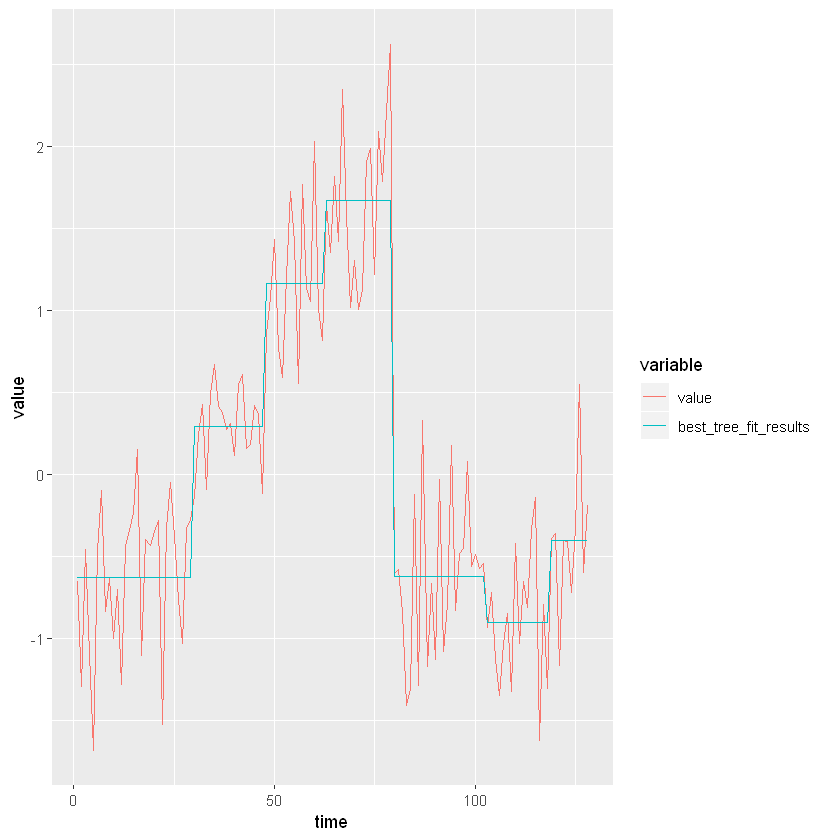

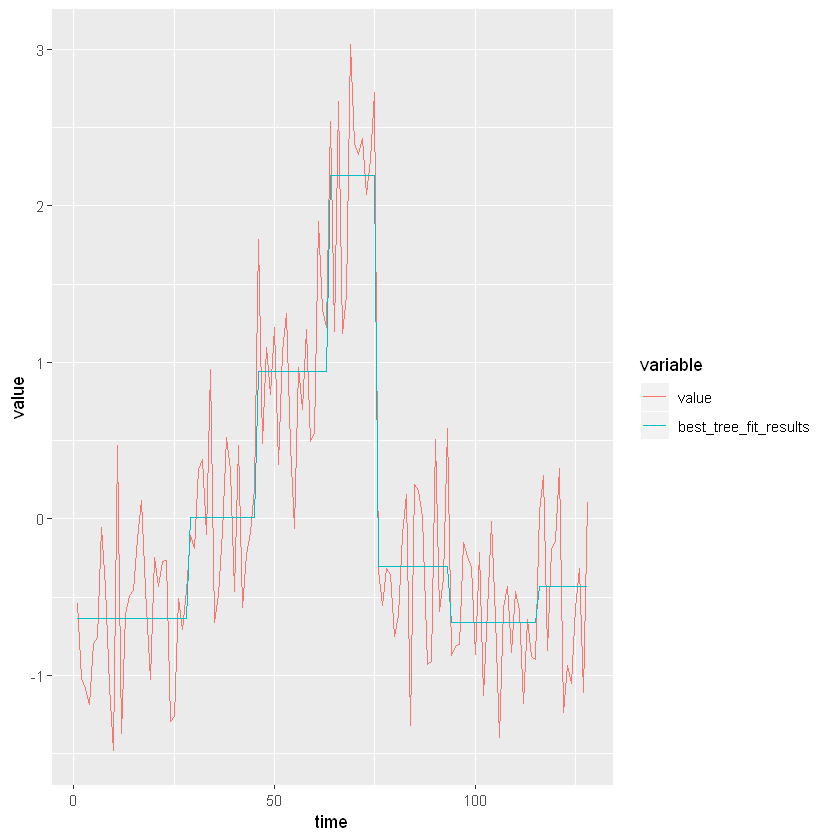

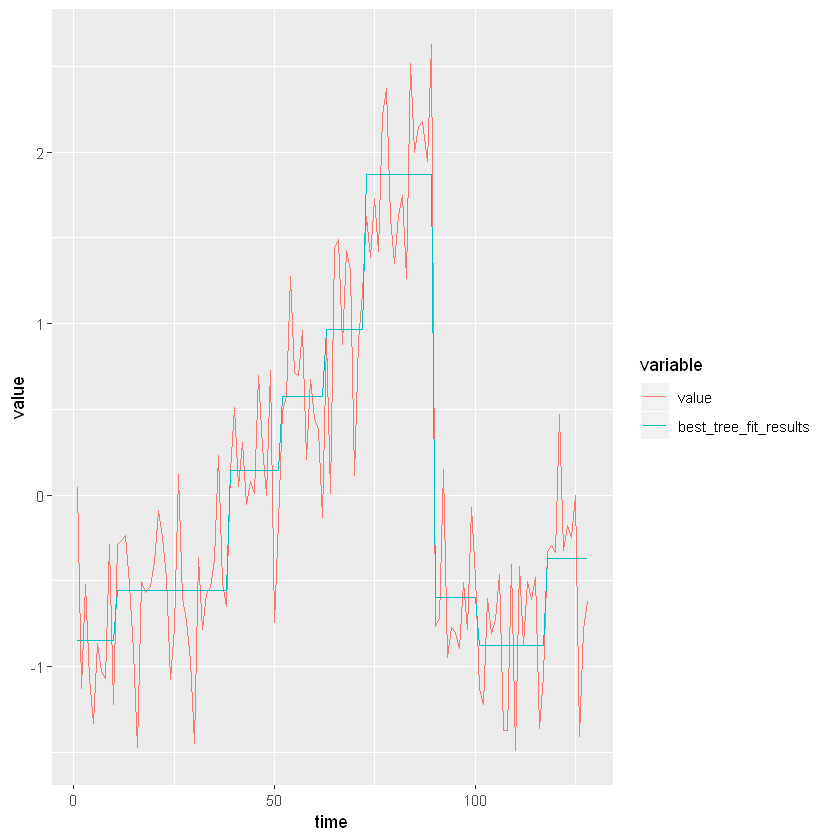

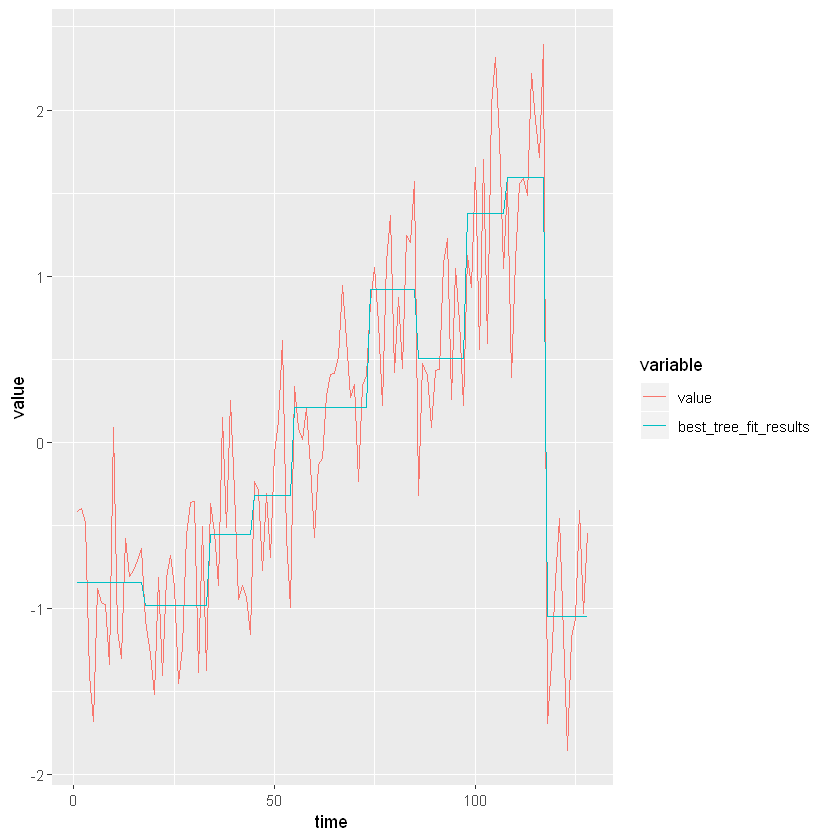

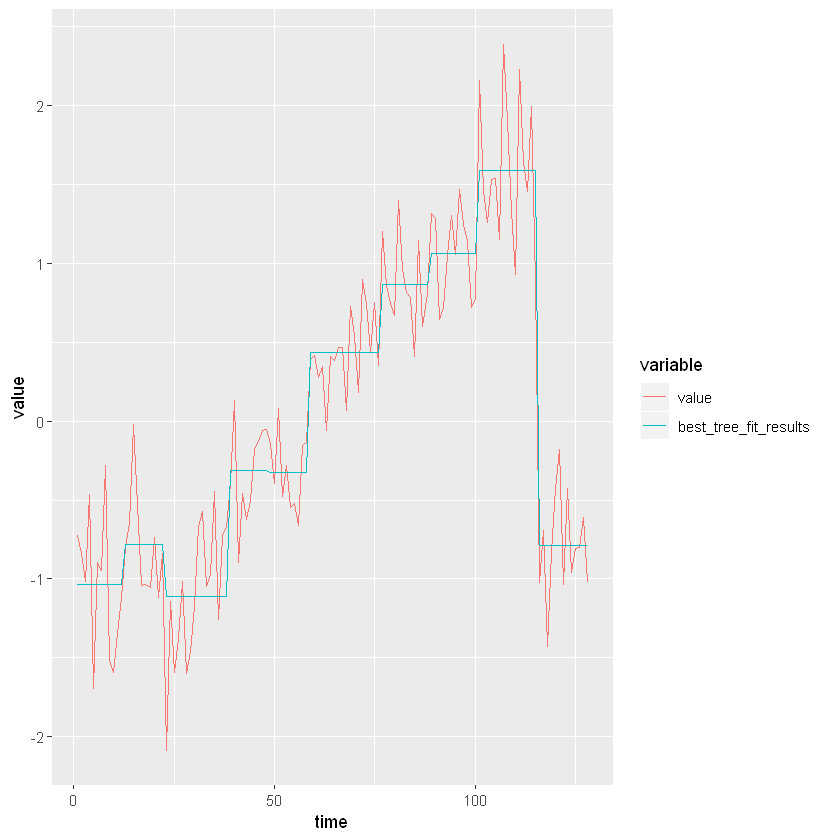

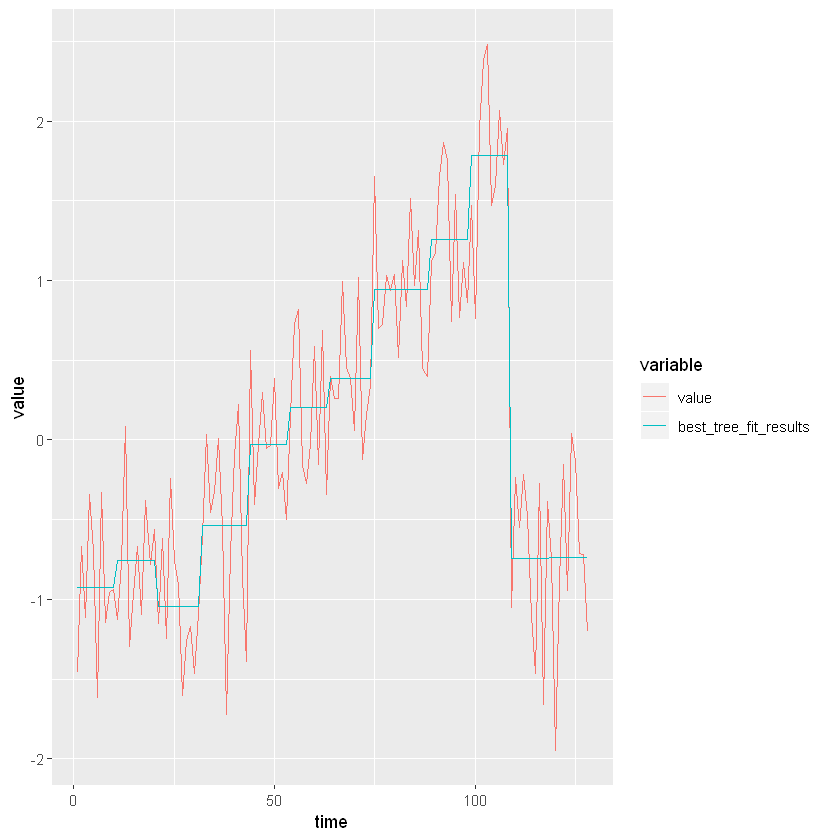

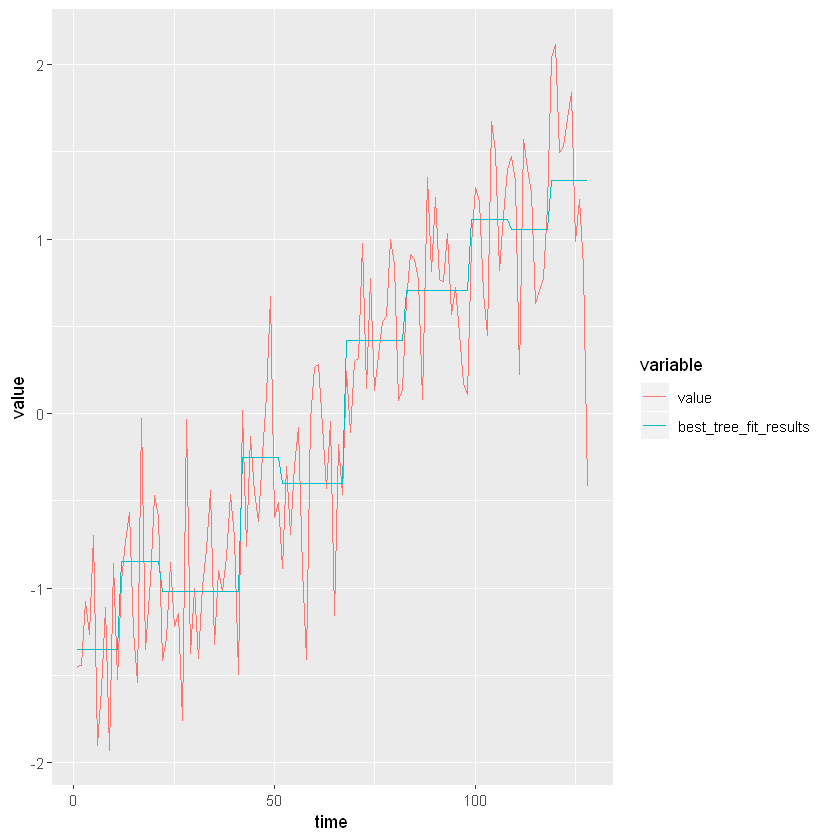

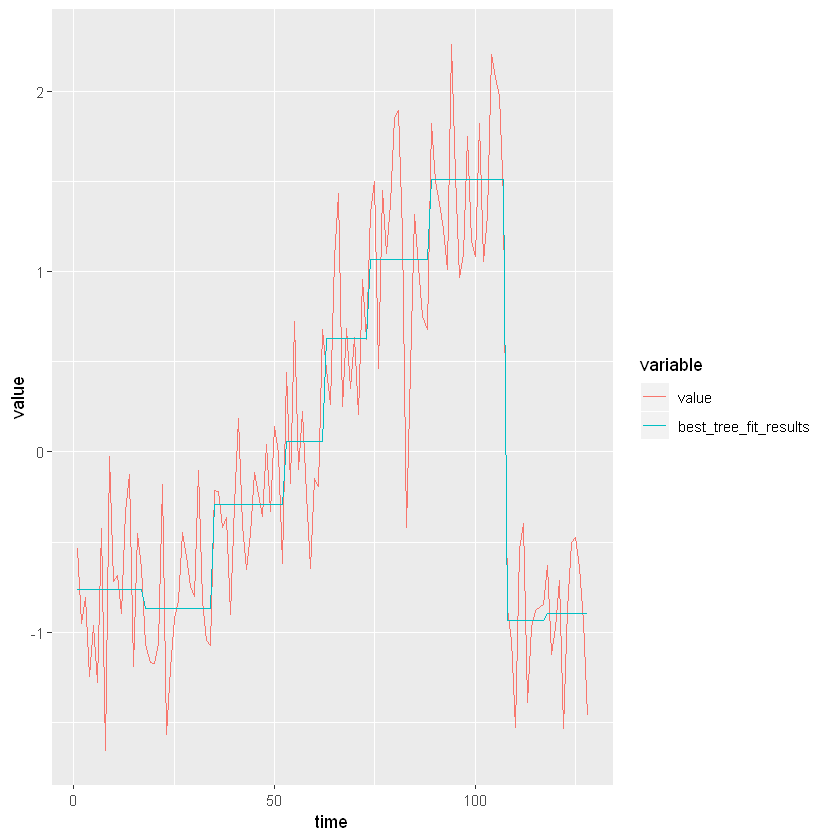

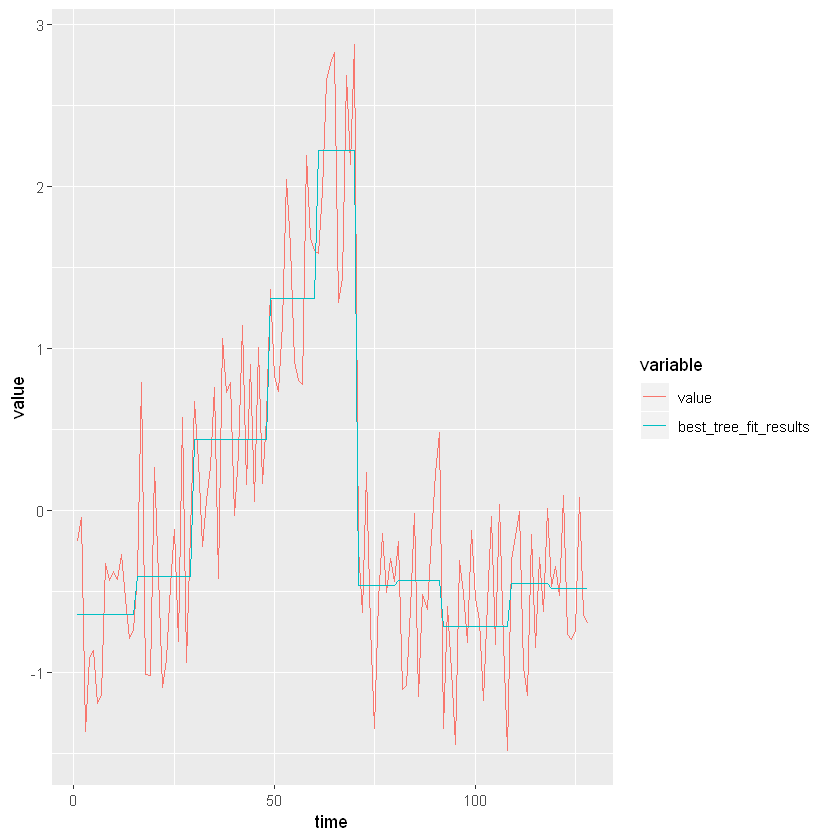

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."

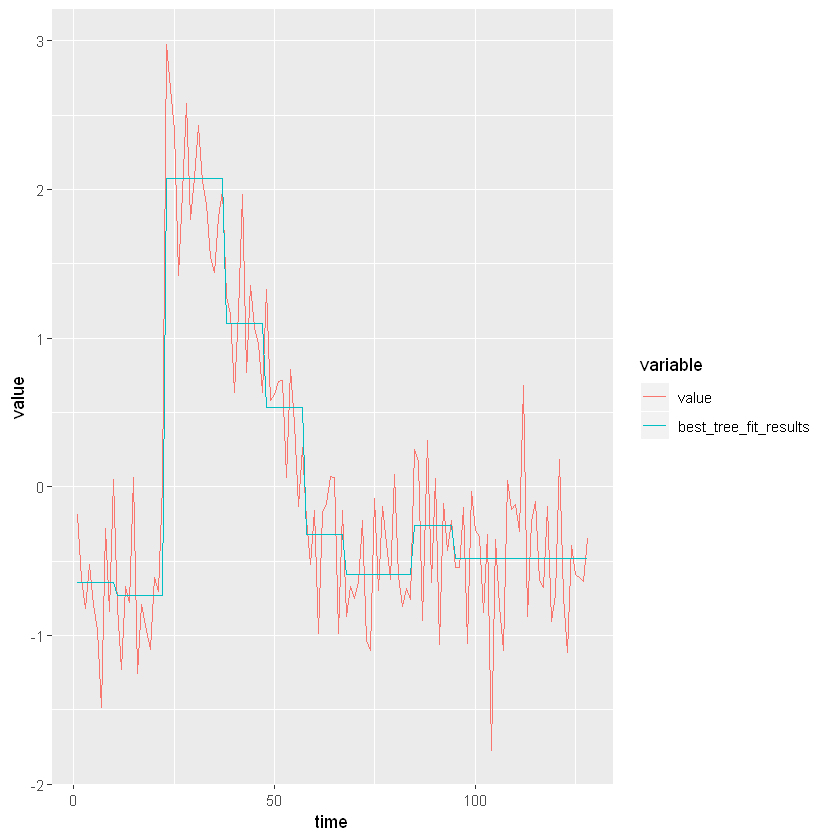

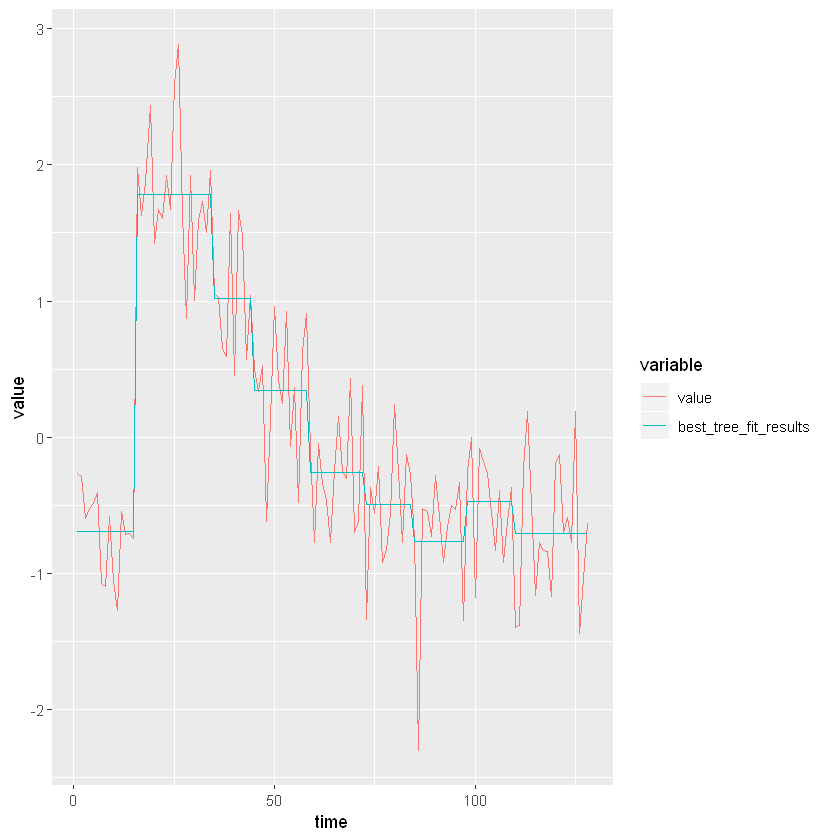

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."

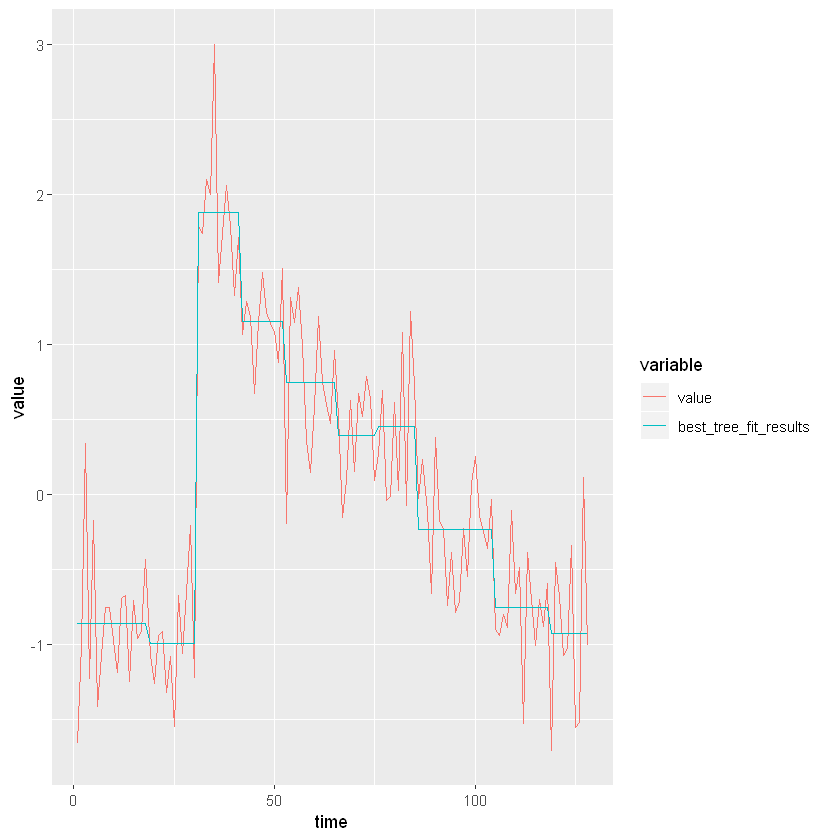

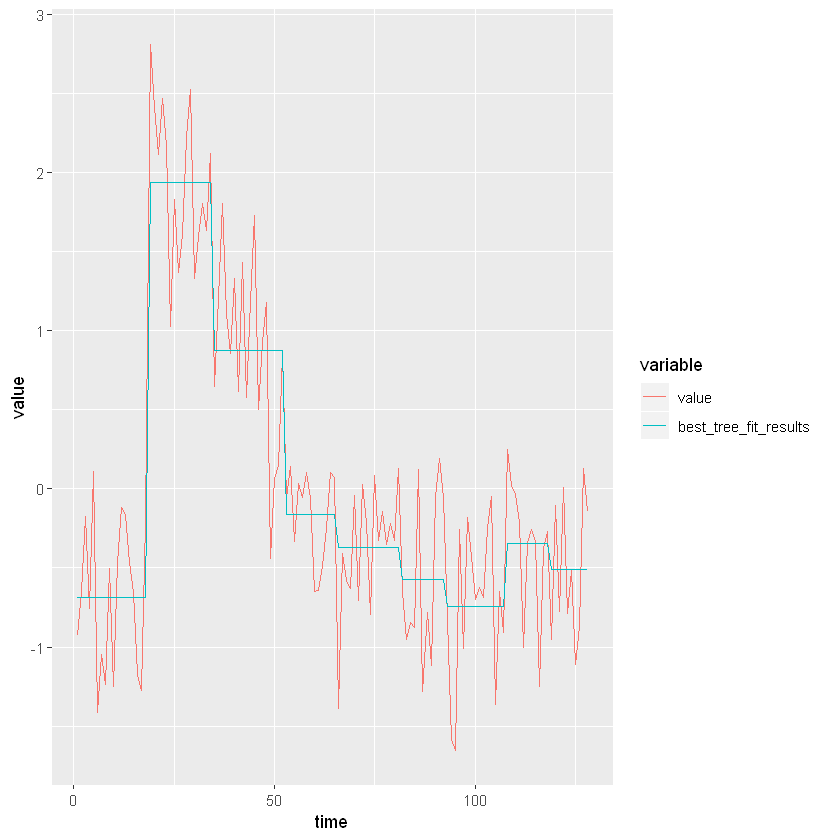

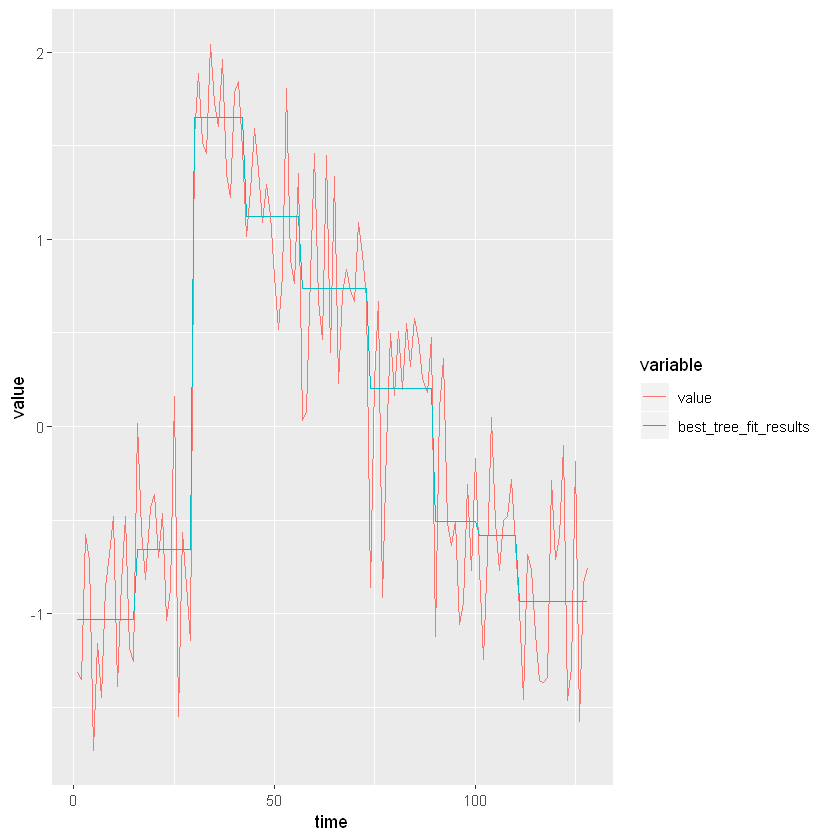

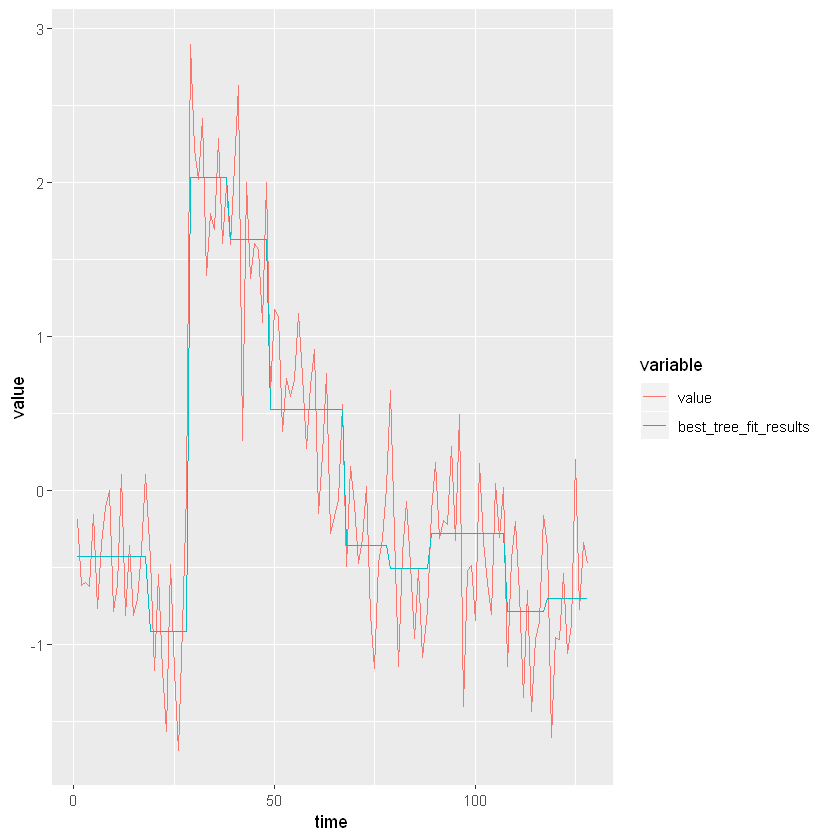

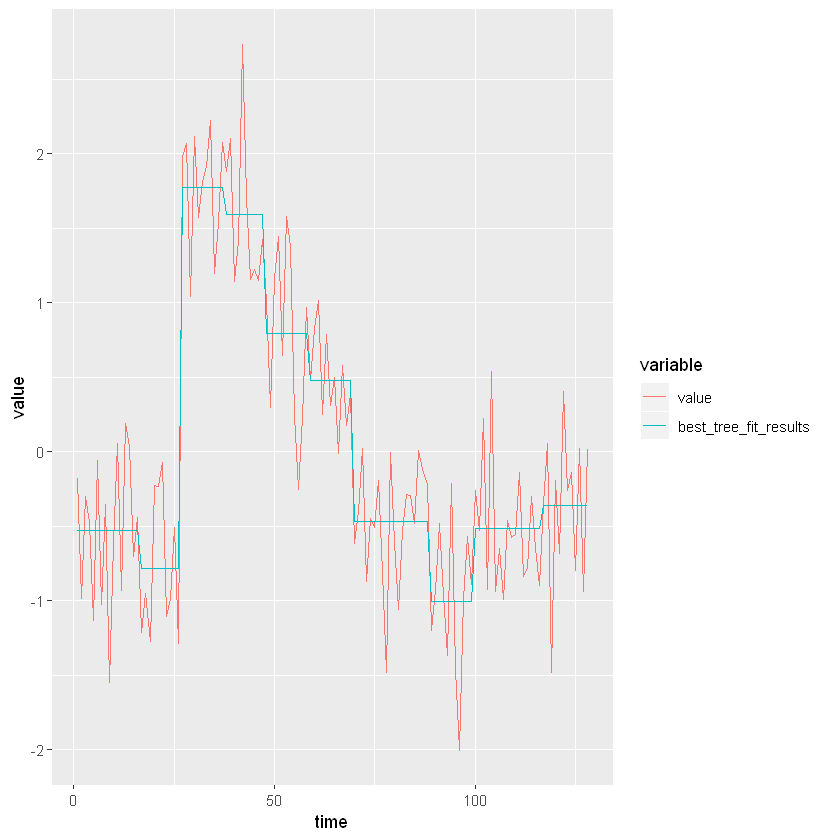

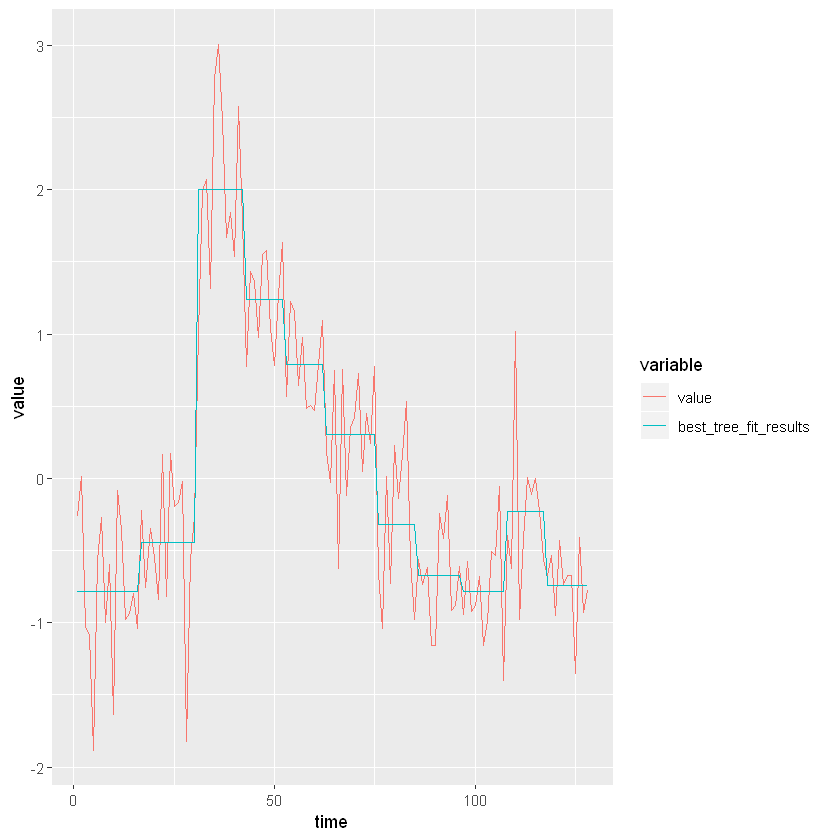

In [5]:
for(j in 1:30){
  
  
  selected_dt <- long_train[id == j]
  
  
  for(i in 1:5){
    
    fit_tree=train(value~time, 
                   data= selected_dt,
                   method = "rpart",
                   metric = 'RMSE',
                   control = rpart.control(minsplit = 20, minbucket = 10, maxdepth = i),
                   trControl = ctrl1,
                   tuneGrid = expand.grid(cp = 0), 
    )
    tree_depths[[i]] <- fit_tree$results
    
}
  
  depth_results = rbindlist(tree_depths)
  depth_results[, max_depth:=seq(1,5)]
  
  
  
  
 
  best_depth <- which.min(depth_results$RMSE)
    
  best_model_fit <-train(value~time, 
                         data= selected_dt,
                         method = "rpart",
                         metric = 'RMSE',
                         control = rpart.control(minsplit = 20, minbucket = 10, maxdepth = best_depth),
                         trControl = ctrl1,
                         tuneGrid = expand.grid(cp = 0), 
  )
  
  

  
  
  
  predicted_dt <-selected_dt[,best_tree_fit_results:=predict(best_model_fit,selected_dt)]
  
  data_plot=melt(predicted_dt,id.vars='time',measure.vars=c('value','best_tree_fit_results'))
  

  print(ggplot(data_plot,aes(x=time,y=value,color=variable))+geom_line())+ggtitle(paste0(j,".Time Series Prediction"))
  
}